# Desarrollo de un Sistema de Aprendizaje Automático para el Reconocimiento de Actividad Humana con Smartphones

Este proyecto busca aplicar las técnicas de aprendizale automático supervisado aprendidas a lo largo del curso al dataset [Human Activity Recognition database](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data).

El dataset utilizado contiene lecturas 30 individuos, tomadas a un ratio de 50 kHz por los sensores embebidos de sus teléfonos móviles. Las medidas concretas son:
- Aceleración lineal triaxial del acelerómetro.
- Velocidad angular triaxial del giroscopio.

A partir de estas medidas base de acelerómetro y giroscopio, los creadores del dataset han aplicado una serie de preprocesamientos para crear nuevos atributos que faciliten la predición. Estos se especificarán con detalle más adelante.

El dataset se compone de 563 columnas, de las cuales 561 son un vector de atributos con distintas mediciones de variables de tiempo y frecuencia, y las otras 2 son la actividad y el ID del sujeto que la llevó a cabo.
El número de instancias es de 10299, con un tamaño total de 26MB.

Cabe destacar que el conjunto de datos no contiene datos nulos, un gran desbalance de clases ni una alta presencia de outliers, y ha sido previamente particionado en conjuntos de entrenamiento y test, formados por el 70% y 30% de las personas participantes en la recogida de datos, respectivamente.

Sobre este dataset se entrenarán modelos de clasificación multiclase con el objetivo de clasificar las actividades realizadas independientemente del sujeto, dados los atributos de los sensores previamente mencionados. Las clases a predecir son:

- `WALKING`
- `WALKING_UPSTAIRS`
- `WALKING_DOWNSTAIRS`
- `SITTING`
- `STANDING`
- `LAYING`

Se han utilizado modelos de **k-Nearest Neighbours**, **Support Vector Machine** (con distintos kernels) y **Árboles de decisión** para la predicción, y se comprobará que modelo logra un mejor rendimiento sobre el conjunto de test.

Para la evaluación del modelo se han presentado matrices de confusión que permitan ver los resultados de cada modelo en cada clase, y se han utilizado las siguientes métricas:

- **Exactitud (accuracy)**: aciertos sobre el total de muestras. Elegida ya que funciona correctamente con datasets balanceados, como es el caso en este.

- **F1-score weighted**: media harmónica de *recall* y *precision* calculada de forma independiente para cada clase, y luego se calcula la media ponderada.

  Indicada para situaciones con desbalandeo de clases. El balance de clases nunca es perfecto, y aunque en este dataset es bueno , se ha elegido esta métrica para comparar con los resultados de accuracy y ver si el desbalance presente afecta al rendimiento de los modelos.

- **AUC macro**: media usando One-Vs-Rest del área bajo la curva ROC. Indica lo bueno que es un clasificador en base a la tasa de falsos positivos y la de verdaderos positivos.

  Útil para poder tomar decisiones de modificación de hiperparámetros sobre clasificadores parametrizados, como por ejemplo modificar $C$ en una SVM para permitir mayor o menor tolerancia a errores.

# Estructura del proyecto:
1. [Fases a completar](#fases-a-completar)
2. [texto](#texto)
2. [texto](#texto)
2. [texto](#texto)
2. [texto](#texto)
2. [texto](#texto)
2. [texto](#texto)

# Fases a completar <a name="fases-a-completar"></a>

1. Análisis y exploración de los datos

2. Escalado estandarización de los datos
  - Mantener separado train y test! Normalizar test una vez se ha seleccionado train.

3. Reducción de dimensionalidad
  - Buscar mejor método. Probar sin reducción también.
  - LDA, PCA, t-SNE
  - PCA + t-SNE: primero PCA reduce mucho y luego t-SNE el resultado final

4. Crear Pipeline con los pasos anteriores

5. Para cada uno de los siguientes modelos:
  1. Árboles de decisión
  2. k-NN
  3. Máquinas de soporte vectorial con distintos kernels.
  4. Si da tiempo probar con modelos más complejos / ensembre learning

  Hay que hacer los siguientes pasos:
  1. Baseline: modelo sin hiperparámetros para comparación. Comprobar overfitting / underfitting.
  2. Elegir unna técnica de optimización de hiperparámetros y los hiperparámetros a optimizar, ejecutar la búsqueda para cada uno de ellos. También elegir el número de folds para cross-validation.
  3. Comprobar overfitting / underfitting para los mejores hiperparámetros encontrados.

6. Evaluación y selección de modelos:
  - Crear matriz de confusión y classification report para cada modelo
  - Crear (posiblemente) para combinaciones distintas de preprocesado?
  - Crear report con Curva ROC y AUC.
  - Identificar el mejor modelo.

7. Conclusiones y resultados


# DUDAS

DUDA: usar también un mismo estado para reproducibilidad??
- si, si no puede parecer que hay cambios en los hiperpar´ametros o en otras cosas

DUDA: en que orden hacer normalización, reducción de dimensionalidad y selección de atributos??
- no hay un orden eespecifico: depende de los datos qu etengas: igual te interesa primero quitar dimensiones, o prmero cambiar la dostribuci´on para que ra reducci´on sea mejor...

[order between those stackoverflow](https://stackoverflow.com/questions/46062679/right-order-of-doing-feature-selection-pca-and-normalization)

[reddit normalize after pca](https://www.reddit.com/r/datascience/comments/15u6esb/feature_selection_normalization_before_or_after/?rdt=59437)

DUDA: como compruebo el overfitting tras hacer un proceso de CV con una busqueda de hiperparámetros? hace falta?
- es mejor comprobar el overfitting igual: usar el par´ametro `search.cv_results_`.
Puedo hacer la diferencia con todos, y hacer la media.

DUDA: para comprobar overfitting / underfitting uso solo accuracy o también puedo usar otras métricas??
- se pueden usar otras. Est´a bien explicar por qu´e se eligen varias, y qu´e representa cada una en el contexto del problema

DUDA: cómo sé cuando normalizar, cuando escalar, que escalado usar... tengo que estudiar los datos por ejemplo para ver la distribución y los outliers??
- Est´a bien hacer un estudio de los datos previo. Se pueden hacer plots de la diferencia entre datos, y es muy importante mirar los outliers.
Por otro lado, se pueden tomar la decisi´on en base a un estudio previo: puede ser que alguien haya estudiado ya las distribuciones de los datos que se usan y eso da info de qu´e utilizar

DUDA: cómo saber que técnica de reducción de dimensionalidad usar? alguinas van mejor para pocas dim, otras no...
también debería realizar un proceso de selección de atributos??
- De nuevo, depende de las distribuciones y caracter´isticas espec´ificas de los datos.


---

DUDA: hay que hacer los tests todos al final o puedo ir haciéndolos sobre la marcha

In [ ]:
# Dataset
# https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data

# local import se falla google drive
'''from google.colab import files
upload = files.upload()'''
pass

from multiprocessing import cpu_count
cores = cpu_count()
cores

2

In [ ]:
!pip install scikit-optimize

In [ ]:
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import perf_counter

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer, label_binarize
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.manifold import TSNE

from skopt.space import Real, Categorical, Integer
from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from skopt.plots import plot_evaluations, plot_objective, plot_convergence
from sklearn.base import BaseEstimator
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score,
  roc_auc_score, classification_report, RocCurveDisplay, ConfusionMatrixDisplay)

STATE = 42

In [ ]:
# import dataset from drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# Análisis y exploración de los datos

In [ ]:
# read the train split in csv format
train = pd.read_csv('/gdrive/MyDrive/UNIVERSIDADE/3º CURSO/APAU/train.csv')
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [ ]:
# read the test split
test = pd.read_csv('/gdrive/MyDrive/UNIVERSIDADE/3º CURSO/APAU/test.csv')
test

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24,WALKING_UPSTAIRS
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24,WALKING_UPSTAIRS


## Descripción de los atributos del dataset

https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf


1. Se ha separado la aceleración de la gravedad de las lecturas del acelerómetro utilizando un filtro de paso bajo.

2. Se han creado nuevas variables de aceleración angular, jerk del acelerómetro (cambio en la aceleración, segunda derivada de la velocidad) y magnitud euclidiana de todas las variables hasta ahora mencionadas.

3. Una vez hecho esto, para las lecturas de acelerómetro, gravedad y giroscopio se han creado dos columnas: una sobre la variable temporal y otra sobre la frecuencia. Las variables finales se pueden ver en la siguiente imagen:

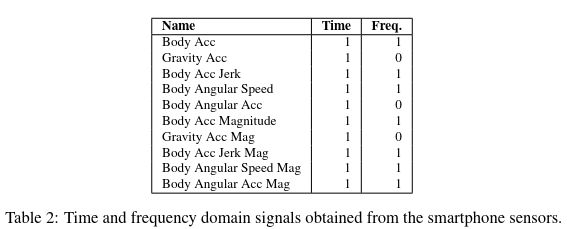




4. Finalmente, sobre cada una de estas se ha aplicado un nuevo mapeo de características, utilizando las siguientes medidas:

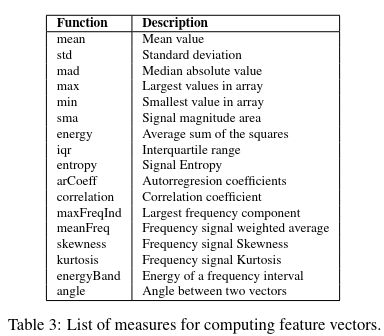

Creamos un vector de clases y un vector de atributos para entrenamiento y test, y eliminamos los datos que no aportarán información al modelo.

Los IDs no tienen poder predictivo ya que el objetivo es predecir la actividad para una persona cualquiera. Manteniéndolos en el dataset favoreceríamos que se detectasen personas específicas. Además, los conjuntos de entrenamiento y test están compuestos por distintos sujetos.

In [ ]:
X_train = train.drop(['subject', 'Activity'], axis=1)
y_train = train['Activity']

X_test = test.drop(['subject', 'Activity'], axis=1)
y_test = test['Activity']

X_holdout_train, X_val, y_holdout_train, y_val = \
  train_test_split(X_train, y_train, test_size=0.15, random_state=STATE) # esto se usará más adelante en ocasiones

In [ ]:
X_train.shape, X_test.shape, X_train.columns, list(y_train.unique())

((7352, 561),
 (2947, 561),
 Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
        'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
        'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
        'tBodyAcc-max()-X',
        ...
        'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
        'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
        'angle(tBodyAccJerkMean),gravityMean)',
        'angle(tBodyGyroMean,gravityMean)',
        'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
        'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
       dtype='object', length=561),
 ['STANDING',
  'SITTING',
  'LAYING',
  'WALKING',
  'WALKING_DOWNSTAIRS',
  'WALKING_UPSTAIRS'])

In [ ]:
# check some of the instances
instance0_0_A = X_train['tBodyAcc-mean()-X'][1]
instance0_0_B = X_train.iloc[1, 0]
assert instance0_0_A == instance0_0_B
print(instance0_0_A)
print(instance0_0_B)

instance0_0_A = X_train['tBodyAcc-mean()-Y'][0]
instance0_0_B = X_train.iloc[0, 1]
print(instance0_0_A)
print(instance0_0_B)
assert instance0_0_A == instance0_0_B

0.27841883
0.27841883
-0.020294171
-0.020294171


## Comprobando la presencia de nulos en el dataset

In [ ]:
# creamos un dataframe de juguete para ver si la función va bien
data = {'Name': [np.nan, 'nick', np.nan, 'jack'],
        'Age': [np.nan, 30, 19, 18]}
df = pd.DataFrame(data)

def has_nulls(df, verbose=True):
  '''Checks if the dataset has null values. Shows where with `verbose=True`'''
  hasNAN = df.isnull().sum()
  hasNAN = hasNAN[hasNAN > 0]
  hasNAN = hasNAN.sort_values(ascending=False)
  print(hasNAN, end="\n\n")

  return hasNAN.size > 0

has_nulls(df, verbose=True)
# ahora comprobamos si nuestro dataset real tiene nulos
nulls_train = has_nulls(X_train, verbose=True)
nulls_test = has_nulls(X_test, verbose=True)
nulls_train, nulls_test

Name    2
Age     1
dtype: int64

Series([], dtype: int64)

Series([], dtype: int64)



(False, False)

## Comprobando la normalización de los datos

En la preview del dataset podemos observar que las distribuciones parecen estar siempre en valores fijos entre $[-1, 1]$.
Crearemos una función para comprobar si esto es así.

In [ ]:
# creamos un dataframe de juguete para ver si la función va bien
data = {'attr1': [0.1]*7,
        'attr2': [0.1, 0, 3, 0.999, -0.9, 1, -4]}
df = pd.DataFrame(data)

#comprobar los máximos y mínimos de cada columna
# queremos saber los rangos de cada elemento para saber si ya estan normalizados
def check_out_of_range(df, minval, maxval):
  """Checks which columns in a datarfame are out of the given numeric range."""
  out_of_range = dict()
  for column in df.columns:
    min = df[column].min()
    max = df[column].max()
    if min < minval or max > maxval:
      out_of_range[column] = (min, max)

  print("Cols out of range: ", out_of_range) if bool(out_of_range) else print('No cols out of range', end="\n\n")

print("Test dataset: ")
check_out_of_range(df, -1, 1)
print("Human Activity Recognition dataset: ")
check_out_of_range(X_train, -1, 1)

Test dataset: 
Cols out of range:  {'attr2': (-4.0, 3.0)}
Human Activity Recognition dataset: 
No cols out of range



## Sobre las distribuciones de los atributos
Los atributos del dataset, aunque normalizados y procesados, no comparten distribuciones. Ciertos atributos si lo hacen, como por ejemplo los derivados del cálculo de la desviación estándar, o las medias de aceleración del cuerpo para los ejes X, Y, Z.

No se deberían aplicar al dataset modelos y procesamientos que dependan de, o asuman, una distribución fija de los datos. Si se quiere hacer esto, habría que hacerlo sobre un subconjunto de atributos seleccionado.

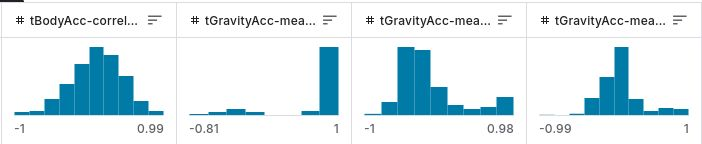

## Usando el Local Outlier Factor para determinar la proporción de outliers en el dataset

https://scikit-learn.org/1.5/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor

El LOF permite ver el grado en el que las muestras del dataset son outliers:

> _The opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_  _close to -1), while outliers tend to have a larger LOF score._

> _The local outlier factor (LOF) of a sample captures its supposed ‘degree of abnormality’. It is the average of the ratio of the local reachability density of a sample and those of its k-nearest neighbors._

Los valores para LOF vienen recomendados por la guía de usuario de Scikit Learn. 20 es un valor estándar para `n_neigbors`. El parámetro `contamination` determina el umbral a partir del cual se considera una instancia outlier. Si no se especifica, el algoritmo lo determina de forma automática. En este caso, la especificación de 0.01 (1%) es mucho más generosa que la del algoritmo, que considera muchos menos outliers.

In [ ]:
#comprobar outliers
from sklearn.neighbors import LocalOutlierFactor

# we set n_neigbors to the standard recommended value 20
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
clf.fit_predict(X_train)
clf_auto = LocalOutlierFactor(n_neighbors=20)
clf_auto.fit_predict(X_train)
# see some of the results
X_scores = clf.negative_outlier_factor_
print(X_scores.shape)
print(X_scores)

(7352,)
[-1.51250875 -1.04592516 -1.02306275 ... -1.02502088 -1.02111953
 -1.00732075]


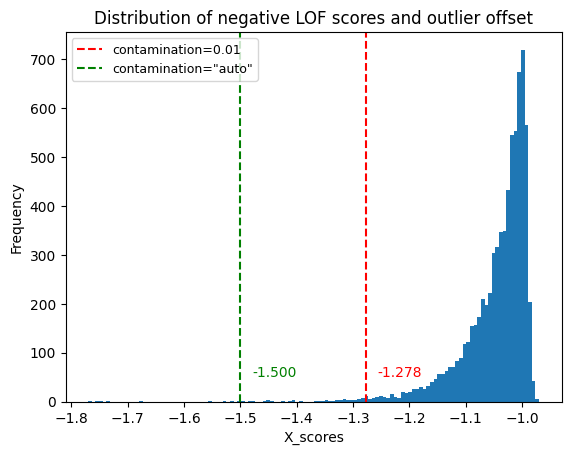

In [ ]:
# plot distribution of X_scores and show where the thresholds lie
plt.hist(X_scores, bins='auto')

# draw line at clf.offset_
plt.axvline(x=clf.offset_, color='r', linestyle='--')
plt.axvline(x=clf_auto.offset_, color='g', linestyle='--')
plt.xlabel('X_scores')
plt.ylabel('Frequency')
plt.title(f'Distribution of negative LOF scores and outlier offset')
# set legend for lines
plt.legend(['contamination=0.01', 'contamination="auto"'], fontsize=9)

# add text annotations for offset values
ymin, ymax = plt.ylim()
plt.text(clf.offset_ + 0.1, ymin + 50, f'{clf.offset_:.3f}', color='r', ha='right')
plt.text(clf_auto.offset_ + 0.1, ymin + 50, f'{clf_auto.offset_:.3f}', color='g', ha='right')

plt.show()

## Comprobando el balance de clases y datos en el dataset



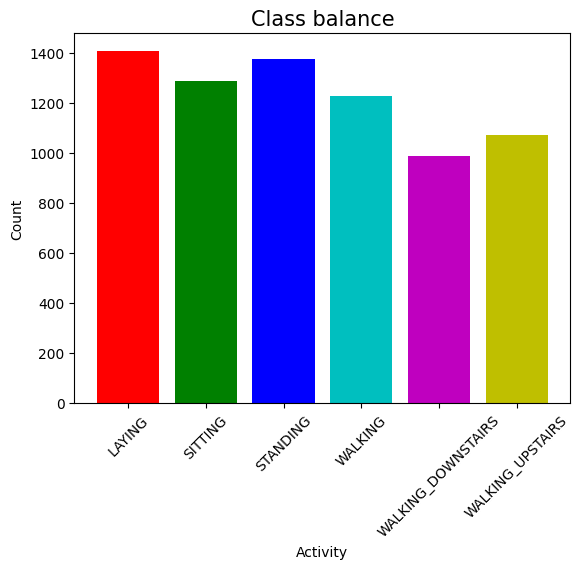

In [ ]:
# check class inbalances with a plot
# Get the unique activities and their counts
activities, counts = np.unique(y_train, return_counts=True)

plt.bar(activities, counts, color=['r', 'g', 'b', 'c', 'm', 'y'])
plt.title('Class balance', fontsize=15)
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Display the plot
plt.show()

# Visualización de los datos

Inspirándome en este [cuaderno de Exploratory Data Analysis](https://www.kaggle.com/code/abheeshthmishra/eda-of-human-activity-recognition) decidí hacer una serie de visualizaciones de los datos para conocer su distribución. La idea es por un lado visualizar y comparar los datos de algunos atributos esepcíficos, y por otro proyectar el conjunto de datos a un número de dimensiones que se pueda visualizar y ver si se puede extraer alguna conclusión.



## Intuiciones acerca de la distribución de los datos

Lo primero es graficar distribución de algunos de los datos más 'intuitivos', que no requieran conocimiento del dominio extenso, para hacerse una idea de las propiedades y características del dataset.

Decidí graficar 8 de las columnas del dataset:
- `tBodyAcc-mean()-X, Y, Z`: medias de las medidas del acelerómetro, muestreadas con una ventana deslizante fija de 2.56 segundos y solapamiento del 50%.
- `tBodyGyro-mean()-X, Y, Z`: media de las medidas del giroscopio,muestreadas con una ventana deslizante fija de 2.56 segundos y solapamiento del 50%.
- ` 'tBodyAccMag-mean()'`: media agregada de las medidas anteriores de acelerómetro.
- ` 'tBodyAccMag-mean()'`: media agregada de las medidas anteriores de giroscopio.

In [ ]:
def plot_density_for_classes(train, column, size=(9,6), cut_sides=False):
  fig, ax = plt.subplots(figsize=size)
  colors = plt.cm.tab10(np.linspace(0, 5))

  # iterate through unique activities and plot densities
  for i, activity in enumerate(train['Activity'].unique()):
    subset = train[train['Activity'] == activity]
    density = np.histogram(subset[column], bins=50, density=True)  # calculate density
    ax.plot(density[1][:-1], density[0], color=colors[i], label=activity)

  if cut_sides:
    xmin, xmax = ax.get_xlim()
    xrange = xmax - xmin
    # reduce x-axis range by `cut_sides`% on each side
    ax.set_xlim(xmin + cut_sides * xrange, xmax - cut_sides * xrange)

  ax.legend()
  ax.set_xlabel(column)
  ax.set_ylabel('Density')
  ax.set_title(f'Density Plots of {column} by Activity')

  plt.show()

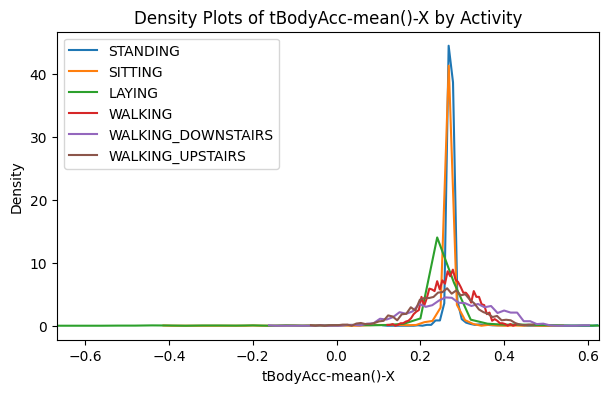

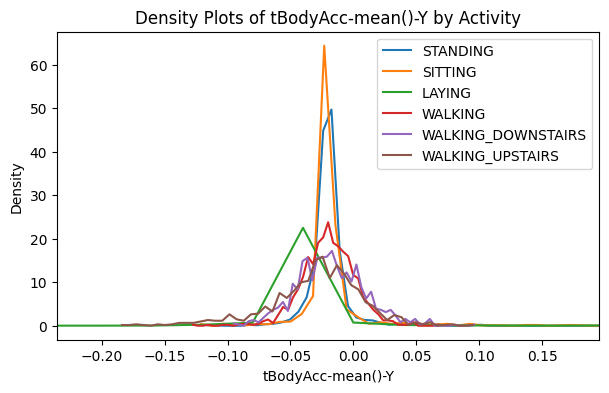

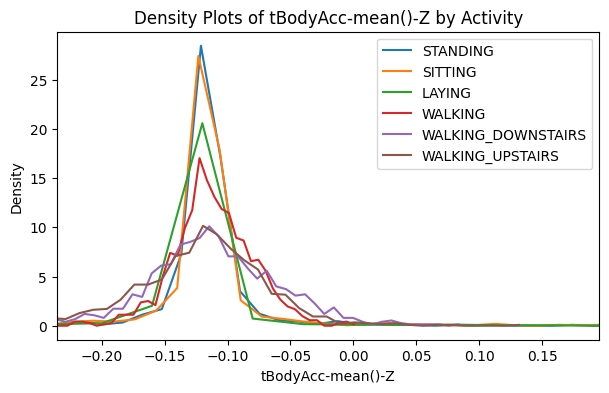

In [ ]:
plot_density_for_classes(train, 'tBodyAcc-mean()-X', size = (7,4), cut_sides=0.2)
plot_density_for_classes(train, 'tBodyAcc-mean()-Y', size = (7,4), cut_sides=0.4)
plot_density_for_classes(train, 'tBodyAcc-mean()-Z', size = (7,4), cut_sides=0.4)

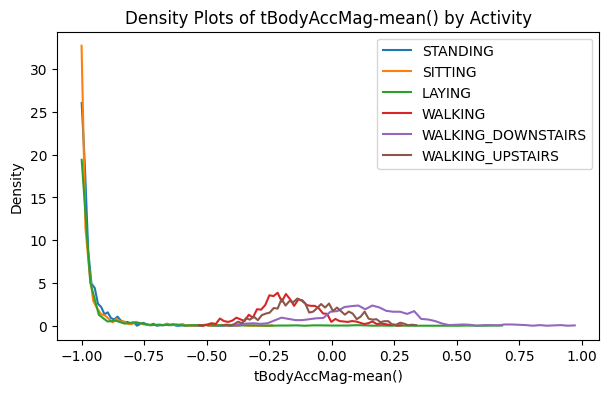

In [ ]:
plot_density_for_classes(train, 'tBodyAccMag-mean()', size = (7,4))

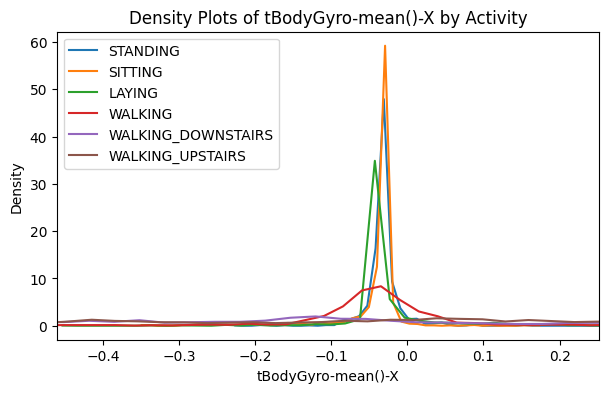

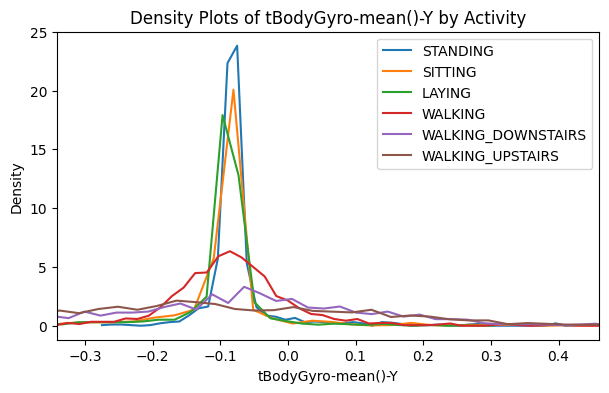

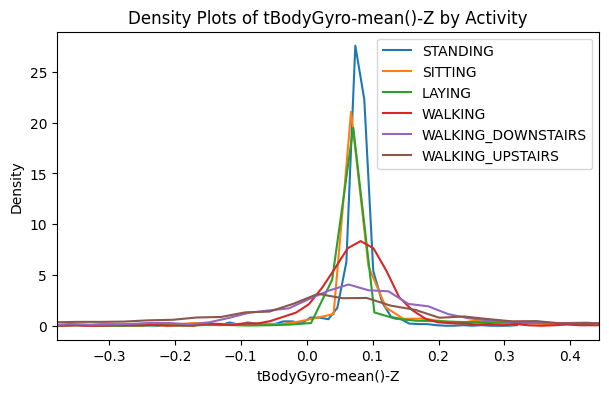

In [ ]:
plot_density_for_classes(train, 'tBodyGyro-mean()-X', size = (7,4), cut_sides=0.3)
plot_density_for_classes(train, 'tBodyGyro-mean()-Y', size = (7,4), cut_sides=0.3)
plot_density_for_classes(train, 'tBodyGyro-mean()-Z', size = (7,4), cut_sides=0.3)

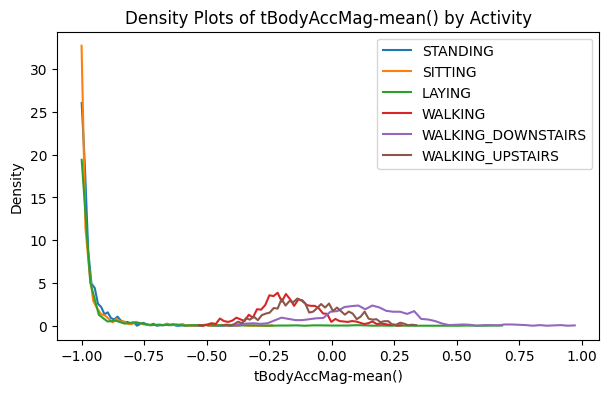

In [ ]:
plot_density_for_classes(train, 'tBodyAccMag-mean()', size = (7,4))

## Visualización en menor dimensión

También inspirándome en el cuaderno anteriormente mencionado, decidí proporcionar una visión del conjunto de datos para comprobar la separabilidad, de las clases, y conocer que clases serán más complejas de separar.

El *t-distributed Stochastic Neighbor Embedding* es un método para visualización de datos de numerosas dimensiones.
Realiza una reducción de dimensionalidad no lineal creando una distribución de probabilidad que representa las similitudes entre muestras en un espacio de gran dimensión y uno de menor dimensión.

Como mantiene la estructura local de los datos, los puntos cercanos en el espacio original tenderán a estar próximos en el espacio reducido.
Esto permite realizar una "proyección" para visualizar los datos en 2 o 3 dimensiones.

A continuación se crea una función que permite la reducción de dimensionalidad de los datos aplicando t-SNE y usando distintas perplejidades (hiperparámetro de t-SNE, determina la desv. estándar de las distr. de prob. que usa):

In [ ]:
def reduce_dim_tsne(X, dims, perplexities):
  reduced_data = []
  for perplex in perplexities:
    #Aplicamos un método para reducir los datos a 3 dimensiones
    red_dim = TSNE(n_components=dims, random_state=STATE, perplexity=perplex)
    X_reduced = red_dim.fit_transform(X)
    reduced_data.append(X_reduced)

  return reduced_data

También creo una función para la representación en 2 o 3 dimensiones del dataset una vez se le ha aplicado la reducción de dimensionalidad:

In [ ]:
def plot_projection_2d_or_3d(X_list: list, y, dim, plot_size=(10,8)):
  """Función para visualizar proyecciones a partir de una lista de datos reducidos.

  Parámetros:
  - X_list: Lista de conjuntos de entrenamiento reducidos a 2 o 3 dimensiones.
  - y: Vector de clases que asigna colores a cada punto.
  - dim: Dimensión de los datos (2 o 3).
  """
  import matplotlib as mpl
  assert dim in [2, 3], "La dimensión debe ser 2 o 3"

  # create a map of activity names and their number and generate a targets vector from it
  names = {v: k for (k, v) in enumerate(list(y.unique()))}
  targets = [names[inst] for inst in y]
  # create a custom colormap of 5 colours
  custom_cmap = mpl.colors.ListedColormap(plt.cm.tab10(np.arange(6)))

  for X_reduced in X_list:
    # plot on 3d or 2d each reduced dataset
    if dim == 2:
      fig, ax = plt.subplots(figsize=plot_size)

      scatter = ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        c=targets,
        cmap=custom_cmap,
        s=2,
      )
    else:
      fig = plt.figure(1, figsize=plot_size)
      ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

      scatter = ax.scatter(
        X_reduced[:, 0],
        X_reduced[:, 1],
        X_reduced[:, 2],
        c=targets,
        cmap=custom_cmap,
        s=1,
      )

    ax.set_title(f"Primeros {'2' if dim == 2 else '3'} componentes t-SNE")
    ax.set_xlabel("Primer componente")
    ax.xaxis.set_ticklabels([])  # no data on the edges as it's not informative
    ax.set_ylabel("Segundo componente")
    ax.yaxis.set_ticklabels([])
    if dim == 3:
      ax.set_zlabel("Tercer componente")
      ax.zaxis.set_ticklabels([])

    # Crear la leyenda para asociar colores a clases
    legend1 = ax.legend(
        scatter.legend_elements()[0], list(y.unique()), loc="best", title="Clases")

    ax.add_artist(legend1)
    plt.show()

(https://stackoverflow.com/questions/41602588/how-to-create-3d-scatter-animations)

In [ ]:
#X_reduced_list = reduce_dim_tsne(X_train, 2, perplexities=(30,))

In [ ]:
#plot_projection_2d_or_3d(X_reduced_list, y_train, 2)

# Funciones utilizadas a lo largo del cuaderno

In [ ]:
def analize_fitting_estimator(model : BaseEstimator, X_train, y_train, X_val, y_val, conf_matrix=False):
  '''
  Muestra la precisión de los conjuntos de entrenamiento y validación para un solo modelo
  ya entrenado y la diferencia entre ambos, para determinar el overfitting
  o underfitting del modelo.
  '''
  print(f'░░▒▒▓▓ Evaluating Overfitting on Validation and Training sets ▓▓▒▒░░')
  print('Model: ', model)

  predictions_val = model.predict(X_val)
  accuracy_validation = accuracy_score(y_val, predictions_val)
  print('accuracy_validation_set', accuracy_validation)
  if conf_matrix: print(confusion_matrix(y_val, predictions_val), end='\n\n')

  predictions_train = model.predict(X_train)
  accuracy_training = accuracy_score(y_train, predictions_train)
  print('accuracy_training_set', accuracy_training)
  if conf_matrix: print(confusion_matrix(y_train, predictions_train), end='\n\n')

  print('Accuracy difference between training and validation', accuracy_training - accuracy_validation)
  print()

In [ ]:
def analize_fitting_crossval(cv_res, top=3):
  '''
  Muestra la precisión de los conjuntos de entrenamiento y validación para el proceso
  de cross-validation de un modelo realizado con una función de búsqueda de hiperparámetros,
  para determinar el overfitting o underfitting del modelo. `cv_res`: atributo `cv_results_`
  de un objeto `GridSearchCV` o `RandomizedSearchCV`.

  Devuelve un dataframe con la media de entrenamiento, media de validación, sus diferencias,
  los parámetros de la ejecución específica y ranking, ordenado por media en validación.
  `top` permite especificar el número de filas a devolver. Si es -1, devuelve todas.
  '''
  cv_results = pd.DataFrame(cv_res) # convertir el diccionario en dataframe y crear una columna para ver ajuste
  cv_results["diff_train_test"] = cv_results["mean_train_score"] - cv_results["mean_test_score"]
  cv_results.sort_values(by="rank_test_score")

  mean_test_train = pd.DataFrame() # nuevo dataframe con los datos que nos interesan
  mean_test_train["mean_validation_score"] = cv_results["mean_test_score"].apply(lambda x: round(x, 4))
  mean_test_train["mean_train_score"] = cv_results["mean_train_score"].apply(lambda x: round(x, 4))
  mean_test_train["diff_train_validation"] = cv_results["diff_train_test"].apply(lambda x: round(x, 4))
  mean_test_train["rank_validation_score"] = cv_results["rank_test_score"]

  # solo lo hace bien con parámetros de pipelines, no de modelos a secas
  for col in cv_results.columns: # quedarse con las columnas de hiperparámetros
    if '__' in col:
      mean_test_train[col.split('__')[1]] = cv_results[col]

  mean_test_train = mean_test_train.sort_values(by="rank_validation_score")
  mean_test_train = mean_test_train if top == -1 else mean_test_train.head(top)

  return mean_test_train, cv_results # se devuelven los dos por si se quiere hacer algo en el futuro

In [ ]:
def show_confusion_matrix(model : BaseEstimator, X_train, y_train, X_test, y_test,
                          color : plt.cm =plt.cm.YlOrRd, overall_size=4):
  '''Displays confusion matrix. Model must be trained.'''

  fig, ax = plt.subplots(figsize=(overall_size,overall_size-1)) # para que no sea gigante

  disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=list(y_test.unique()),
        cmap=color,
        xticks_rotation=45, # si no no se lee
        ax=ax
  )
  fontsize = overall_size+3
  for text in disp.text_.ravel():
    text.set_fontsize(fontsize)
  # letra de los ejes x e y
  ax.set_xlabel(ax.get_xlabel(), fontsize=fontsize)
  ax.set_ylabel(ax.get_ylabel(), fontsize=fontsize)
  # letra de las etiquetas de los ticks
  tick_fontsize = overall_size+1
  ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

  disp.ax_.set_title(f'Confusion matrix of {model}', fontsize=fontsize+1)
  plt.show()

In [ ]:
def model_evaluation(model : BaseEstimator, X_train, y_train, X_test, y_test, print_full_report=False):
  '''Model evaluation displaying accuracy, f1-score, and f1-score report for each class.
  Model must be trained.'''

  print(f'░░▒▒▓▓ Model Evaluation over Test Set ▓▓▒▒░░')
  # evaluamos el mejor modelo en el conjunto de test
  y_pred = model.predict(X_test)
  #y_proba = model.predict_proba(X_test)


  # calculamos y mostramos las métricas
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  #roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='macro')

  print(f"\nTest Set Performance:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"F1-Score (weighted): {f1:.4f}")
  #print(f"AUC (weighted): {roc_auc:.4f}")

  if not print_full_report:
    print("\nClassification Report (simplified):")
    clf_rep = classification_report(
    y_test, y_pred, target_names=list(y_train.unique()), digits=4, output_dict=True)
    # get rid of the metrics we are not gonna use
    clf_df = pd.DataFrame(clf_rep).drop(['precision', 'recall'], axis=0).T
    clf_df['f1-score'] = clf_df['f1-score'].apply(lambda x: round(x, 4))
    clf_df['support'] = clf_df['support'].apply(lambda x: int(x))
    print(clf_df)
  else:
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=list(y_train.unique()), digits=4))
  print()

In [ ]:
def plot_convergence_and_objective_function(optimizer_results):
  '''Display results from bayesian optimization.
  `optimizer_results` should be the attribute `optimizer_results_[0]` from a `BayesSearchCV` object.
  '''
  # shows the model of the search space the optimizer has built. Also shows hyperparameter dependence
  plot_objective(optimizer_results)#, n_minimum_search=int(1e8))
  plt.show()
  # Displays histogram of most used value ranges in optimization
  plot_evaluations(optimizer_results, bins=30)
  plt.show()
  # shows convergence of obj. function over iterations
  plot_convergence(optimizer_results)
  plt.show()

In [ ]:
# two utitily functions we'll be using
def search_space_size(grid : dict[iter]):
  '''Calculates and returns num. of hyperpar. combinations of a search space, i.e. it's size.
  Continuous spaces are treated as discrete with unit steps.'''
  mul = 1
  for hypp in grid.values():
    if isinstance(hypp, Integer) or isinstance(hypp, Real):
      mul *= (hypp.bounds[1]-hypp.bounds[0]) # multiply by the upper bound of the search space
    else:
      mul *= len(hypp)
  print(f'Size of hyperparameter space: {int(mul)} possible combinations.') # don't return decimals


def print_time(start, ret=False):
  '''Prints elapsed time in miutes and seconds from a initial time reading.'''
  min, sec = divmod(perf_counter()-start, 60)
  print('Total training time: ', int(min), 'min,', round(sec, 1), 'sec')
  if ret: return min, sec # nice syntax python

## QUITAR ESTO EN EL FUTURO???

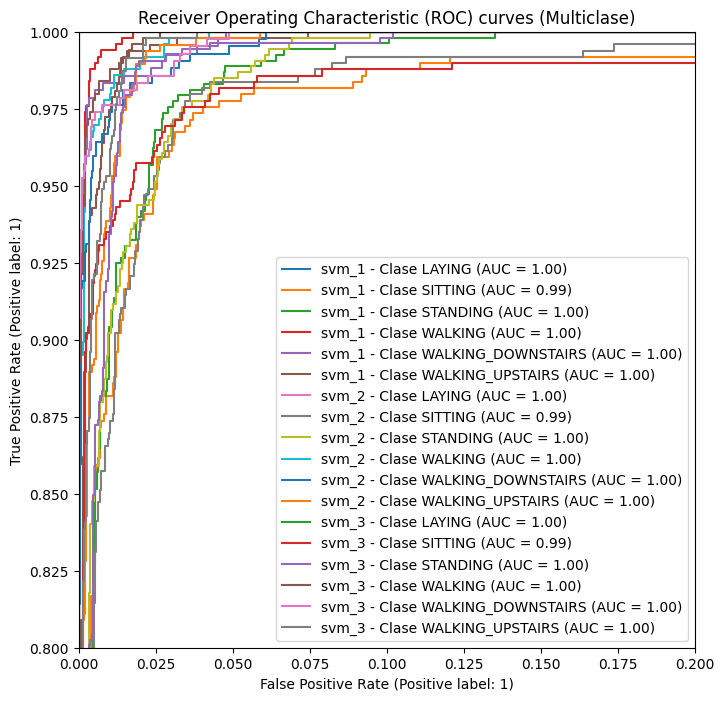

In [ ]:
# Obtener todas las clases únicas presentes en y_train e y_test
all_classes = np.unique(y_train)
n_classes = len(all_classes)

# Binarizar las etiquetas (convirtiéndolas en One-vs-Rest)
y_train_binarized = label_binarize(y_train, classes=all_classes)
y_test_binarized = label_binarize(y_test, classes=all_classes)

# Crear una figura para todas las curvas ROC de cada modelo y cada clase
fig, ax_roc = plt.subplots(figsize=(10, 8))

classifiers = {
    "svm_1": SVC(kernel="linear", C=0.025, probability=True),
    "svm_2": SVC(probability=True),
    "svm_3": SVC(gamma=0.01, C=10000, probability=True)
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)

    # Calculamos las probabilidades de predicción para cada clase
    y_proba = clf.predict_proba(X_test)

    # Trazamos la curva ROC solo para clases presentes en y_test
    for i in range(n_classes):
        if y_test_binarized[:, i].sum() > 0:  # Verificamos si hay muestras positivas para esta clase
            RocCurveDisplay.from_predictions(
                y_test_binarized[:, i],
                y_proba[:, i],
                ax=ax_roc,
                name=f"{name} - Clase {all_classes[i]}"
            )
        else:
            print(f"Clase '{all_classes[i]}' no está presente en el conjunto de prueba.")

ax_roc.set_xlim([0.0, 0.2])  # Zoom en el eje x
ax_roc.set_ylim([0.8, 1.0])  # Zoom en el eje y

ax_roc.set_title("Receiver Operating Characteristic (ROC) curves (Multiclase)")
plt.legend(loc="lower right")

plt.show()

# Preprocesado de datos



In [ ]:
#stop

A la hora de abordar la solución a un problema de aprendizaje automático, es esencial asegurar la calidad de los datos a utiliza. Es por esto que se suele realizar una fase extensa de preprocesado de datos que consiste, generalmente, de las siguientes fases (no siempre en este orden):

1. **Limpieza de datos**: detección y eliminación de datos anómalos, imputación de datos nulos o faltantes, procesamiento y filtrado de ruído en los datos, codificación de atributos categóricos, etc.

  Como se ha visto durante el análisis previo, el dataset de *Human Activity Recognition* ha sido tratado previemente en varios de estos aspectos: no se requiere realizar tratamiento de ruído, hay pocos outliers y todos los datos son numéricos por lo que no se debe procesar esto.

2. **Ingeniería de atributos**: discretización o numerización, pero también la creación de atributos nuevos a partir unos iniciales y conocimiento del dominio, aplicando procesamientos específicos previos.

  El dataset utilizado, como se ha visto anteriormente, tiene una extensa cantidad de atributos obtenidos a partir de una serie de lecturas de sensores básicas.

3. **Escalado, normalización y estandarización**: transforman la escala de los datos para evitar el sesgo y disminución de efectividad que se da en algunos algoritmos con las diferencias de escala.

  La estandarización busca además que los valores de un atributo tengan una media y desviación típicas específicas (normalmente las propias de una distribución normal, 0 y 1).

  En el caso de este dataset, los datos han sido previamente escalados a un rango $[-1,1]$, por lo que no requieren mayor preprocesado en este aspecto. En la sección específica de cada algoritmo se concretarán las necesidades del mismo con respecto a la escala y distribución de los datos.

4. **Reducción de dimensionalidad y selección de atributos**: a la hora de abordar un problema de aprendizaje automático sobre un conjunto con un gran número de dimensiones como el que nos ocupa, es importante realizar una fase de reducción de dimensionalidad, selección de atributos, o ambas. Esta fase se realiza y detalla en la siguiente sección.

5. **Gestión de datos desbalanceados**: en el caso de este dataset, no hay un gran desbalance por lo que no se requiere el uso de técnicas para compensarlo.

6. **Splitting o división en conjuntos**: en la etapa final se suele realizar la división del conjunto de entrenamiento, test, y validación. En este caso, las dos primeras se han realizado en la sección de análisis, dividiendo el dataset en:
  - Conjunto e entrenamiento: muestras de sensores del 70% de los participantes en la recogida de datos.
  - Conjunto de test: muestras de sensores del 30% de los participantes en la recogida de datos.
  - Conjunto de validación de holdout: 15% de muestras del conjunto de entrenamiento.
  - Conjunto de entenamiento de holdout: muestras restantes (85%) de entrenamiento tras la creación del conjunto de validación

## Reducción de dimensionalidad

Como acabamos de ver, la parte más importante a realizar sobre este dataset es la de reducción de dimensionalidad, que se abordará a continuación.

Un conjunto con un número excesivo de dimensiones puede presentar numerosos problemas.
Demasiadas dimensiones llevan a un mayor tiempo de entrenamiento y de predicción.

Por otro lado, se produce el efecto de la "*maldición de la dimensionalidad*". Espacios de atributos demasiado grandes empeoran el rendimiento de los modelos, ya que puede haber atributos innecesarios que "confundan" al modelo. Un espacio muy grande implica la necesidad de una mayor cantidad de datos para que no haya grandes regiones del espacio vacías.

En estos espacios grandes y mayormente vacíos, los modelos pueden tender al sobreajuste al adaptarse a patrones específicos.

- mencionar posibles modelos porn encima (enumerarlos)
- probar con algun otro metodo en el codigo de abajo
- explicar el elegido y por que



[variation of accuracy over dim reduction](https://scikit-learn.org/1.5/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py)

### PCA

In [ ]:
pca = PCA()
svm = LinearSVC()#SVC(C=10000, gamma=0.01, cache_size=2000)
pipe = Pipeline(steps=[("pca", pca), ("svm", svm),])

param_grid = {
    'pca__n_components': list(range(1, 561, 10))
}

search_rbf = GridSearchCV(pipe, param_grid, cv=4, n_jobs=-1)

start = perf_counter()
search_rbf.fit(X_holdout_train, y_holdout_train)
print_time(start)

pca.fit(X_holdout_train) # fitteado en el conjunto "original" para ver la viarianza en todo
X_pca = pca.transform(X_holdout_train)

Total training time:  7 min, 13.5 sec


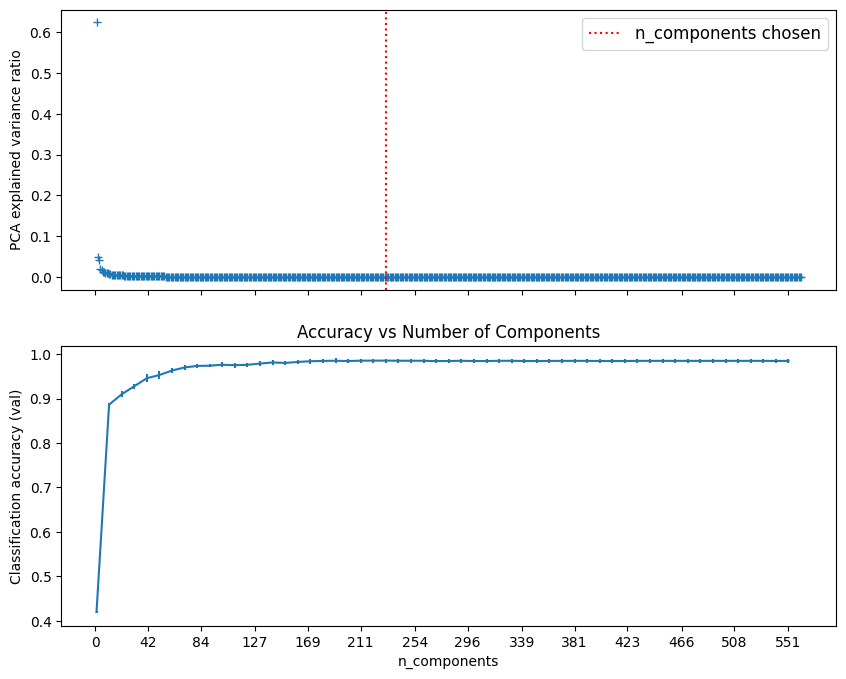

In [ ]:
# For each number of components, find the best classifier results

# Gráfico de la precisión de clasificación con la desviación estándar como barra de error
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))

# gráfica del ratio de varianza explicada de PCA
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search_rbf.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
    color='red'
)
ax0.legend(prop=dict(size=12))

cv_results = pd.DataFrame(search_rbf.cv_results_)
components_col = "param_pca__n_components" # columna que contiene el número de componentes
# para cada número de componentes usado, seleccionar la fila con la mejor media de validación
best_clfs = (
    cv_results.loc[cv_results.groupby(components_col)["mean_test_score"].idxmax()]
    .sort_values(by=components_col)
)

ax1.errorbar( # dibujar la errorbar
    best_clfs[components_col],
    best_clfs["mean_test_score"],
    yerr=best_clfs["std_test_score"],
    #fmt='-o',
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")
ax1.set_title("Accuracy vs Number of Components")

ax0.xaxis.set_ticks(np.linspace(0, max(param_grid['pca__n_components']), 14).astype(int))
ax0.xaxis.set_ticklabels(np.linspace(0, max(param_grid['pca__n_components']), 14).astype(int))

plt.show()


### RFECV sobre el conjunto completo

In [ ]:
from sklearn.feature_selection import RFECV

min_features_to_select = 1  # Minimum number of features to consider
clf = LinearSVC()#SVC(C=10000, gamma=0.01, cache_size=2000)
cv = StratifiedKFold(3)

rfecv = RFECV(
    estimator=clf,
    step=15, # OJO ESTO ESTA CAMBIASDO
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

start = perf_counter()
rfecv.fit(X_train, y_train)
print_time(start)

Total training time:  2 min, 54.6 sec


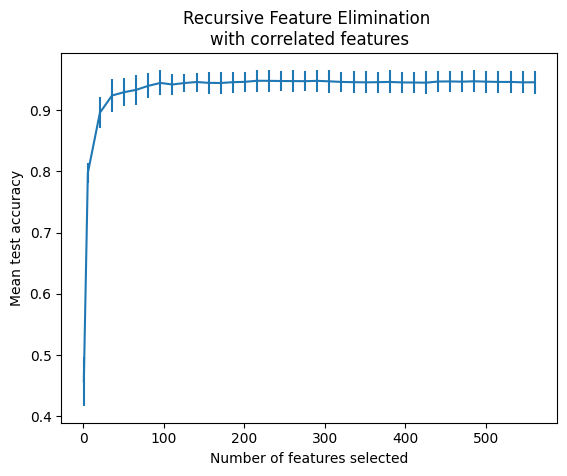

In [ ]:
# plot the results
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")

plt.savefig('/gdrive/MyDrive/UNIVERSIDADE/3º CURSO/APAU/figures/RFE-with-correlated-features.png',
            bbox_inches='tight')

plt.show()

### RFECV sobre los componentes tras aplicar PCA

In [ ]:
min_features_to_select = 1  # Minimum number of features to consider
clf = LinearSVC()
cv = StratifiedKFold(3)

rfecv = RFECV(
    estimator=clf,
    step=15, # OJO ESTO ESTA CAMBIASDO
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)

start = perf_counter()
rfecv.fit(X_pca, y_holdout_train) # usamos X_pca en lugar de X_holdout_train
print_time(start)

Total training time:  2 min, 33.8 sec


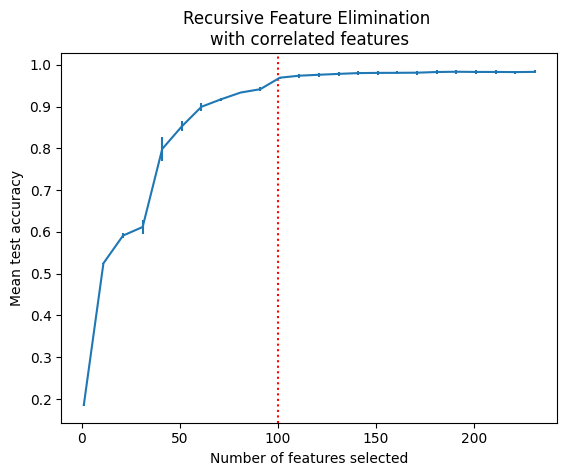

In [ ]:
# plot the results
cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")


selected_dims = search_rbf.best_estimator_.named_steps["pca"].n_components # get final num of selected dimensions
idx = best_clfs.index[best_clfs[components_col]==selected_dims][0] #find index of the value in the dataframe

# slice the columns so they display the current number of used dimensions by rfecv after pca
x_sliced = best_clfs.loc[:idx, components_col]
y_sliced = cv_results.loc[:len(x_sliced)-1, "mean_test_score"]
yerr_sliced = cv_results.loc[:len(x_sliced)-1, "std_test_score"]

plt.errorbar(
    x=x_sliced,
    y=y_sliced,#cv_results["mean_test_score"],
    yerr=yerr_sliced#cv_results["std_test_score"],
)
# put a vertical line in accuracy dropoff
plt.axvline(x=100, color='red', linestyle=':', label="n_components chosen")

plt.title("Recursive Feature Elimination \nwith correlated features")

plt.savefig('/gdrive/MyDrive/UNIVERSIDADE/3º CURSO/APAU/figures/RFE+PCA-with-correlated-features.png',
            bbox_inches='tight')

plt.show()

In [ ]:
#top

# Enfoque con SVM's

Se llevaron a cabo primero las aproximaciones al problema utilizando Máquinas de Soporte Vectorial.

### Preprocesado
Se utilizó e conjunto de datos sin modificaciones más allá de las descritas en la sección de Preprocesamiento anterior.

No se requiere cambiar los datos a una distribución específica, ya que las SVM's no realizan suposiciones de la distribución subyacente de los datos, como si lo hacen otros algoritmos como Naive Bayes, que requiere normalización por asumir una distribución normal.

[Lo que sí requieren son datos escalados, usualmente en el intervalo $[-1,1]$ o $[-1,1]$](https://www.csie.ntu.edu.tw/~cjlin/papers/guide/guide.pdf). Ya que estos ya están escalados en este intervalo, como se vió anteriormente en el análisis del dataset, no se realizan pasos específicos de estandarización ni escalado de los datos.

### Hiperparámetros

Se realizó un procesamiento y optimización de hiperparámetros para cada uno de los kernels: `['rbf', 'linear', 'poly', 'sigmoid']`. En cada uno de ellos se optimizan sus hiperparámetros específicos.

La decisón de realizar una búsqueda de hiperparámetros por kernel radica en que, aunque posible, especificar los hiperparámetros de todos los kernels en la misma búsqueda ampliaría el espacio de búsqueda enormemente, por lo que es mejor realizarlo de forma separada para ahorrar tiempo, y no introducir iteraciones en las que se modifican hiperparámetros que no afectan a un kernel determinado, como `degree` en el kernel lineal, por ejemplo.
  
Además, esto que permite una mejor comparación y análisis de los mismos ya que se puede realizar una evaluación individualizada de cada kernel.


## Modelo base

Primero crearemos un modelo base que nos permita ver la performance del modelo sin ningún tipo de optimización de hiperparámetros ni preprocesamiento de datos.

De este modo, tendremos una base con la que comparar los resultados de los próximos modelos que usen el mismo algoritmo.

In [ ]:
svc = SVC(C=10000, gamma=0.01, cache_size=2000)
start = perf_counter()
svc.fit(X_holdout_train, y_holdout_train)
print_time(start)

Total training time:  0 min, 2.6 sec


In [ ]:
analize_fitting_estimator(svc, X_holdout_train, y_holdout_train, X_val, y_val) # comparar resultados
model_evaluation(svc, X_train, y_train, X_test, y_test) # evaluar métricas del modelo

░░▒▒▓▓ Evaluating Overfitting on Validation and Training sets ▓▓▒▒░░
Model:  SVC(C=10000, cache_size=2000, gamma=0.01)
accuracy_validation_set 0.9891205802357208
accuracy_training_set 1.0
Accuracy difference between training and validation 0.010879419764279197

░░▒▒▓▓ Model Evaluation over Test Set ▓▓▒▒░░

Test Set Performance:
Accuracy: 0.9630
F1-Score (weighted): 0.9630

Classification Report (simplified):
                    f1-score  support
STANDING              1.0000      537
SITTING               0.9386      491
LAYING                0.9491      532
WALKING               0.9679      496
WALKING_DOWNSTAIRS    0.9683      420
WALKING_UPSTAIRS      0.9521      471
accuracy              0.9630        0
macro avg             0.9626     2947
weighted avg          0.9630     2947



Usamos la función `analize_fitting` para comprobar los resultados, y también mostramos las métricas del modelo. Cabe destacar que esta no es una práctica estándar, se suele usar un conjunto de validación pero para este caso sólo queremos

In [ ]:
#STOP HERE

### Observaciones

Los resultados de este modelo básico son destacables. En el paper original de los creadores del dataset se menciona que consiguieron un *accuracy del 96%*. Este modelo base, sin optimización, preprocesado, ni aparente overfitting, consigue una `accuracy` de 95%, `f1-score` similar y `AUC` del 99%.

Estos resultados son muy buenos, y nos llevan a replantear el experimento.Si se consiguen tan buenos resultados sin hacer nada:
- ¿Se podrán optimizar otros aspectos como el tiempo de entrenamiento y predicción mediante la reducción de dimensionalidad y selección de atributos?
- ¿Se podrán mantener los buenos resultados del modelo con esta optimización si se encuentran los hieprparámetros adecuados?

### Introduciendo Pipelines

A la hora de realizar el entrenamiento de los modelos, se ha utilizado un enfoque que basado en pipelines.
Estas son más mantenibles y permiten cambiar transformadores y estimadores, manteniendo el código limpio y organizado y el preprocesamiento y entrenamiento bien definidos.
Este primer modelo tiene muchos comentarios ya que el funcionamiento de las pipelines es específico, con especificación de parámetros a través de formateo de strings y otras características especiales.

## Kernel RBF


### Hiperparámetros

Primero se realizó una **búsqueda del espacio de hiperparámetros por optimización bayesiana**.
Se eligió este método dada su capacidad para modelar la estructura del espacio de búsqueda y llegar antes a combinaciones adecuadas de hiperparámetros. Esto permite también relizar un análisis de la estructura del espacio de hiperparámetros a través de gráficas. También favorece su uso la implementación sencilla y adaptada a la API de *Scikit Learn* que ofrece la librería `scikit-optimize` a través de `BayesSearchCV`.
Las alternativas `RandomizedSearchCV` y `GridSearchCV` se descartaron ya que **presentan los siguientes inconvenientes**:

- El **coste computacional** de examinar el espacio completo que presenta grid search, o búsqueda exhaustiva, lo hace inviable, y este método pierde su capacidad de encontrar valores óptimos en espacios continuos.

- La búsqueda aleatoria es una opción que escala bien en general, y en promedio a partir de un número determinado de iteraciones encuentra valores adecuados para los hiperparámetros. A pesar de esto en espacios complejos, **el número de iteraciones requeridas puede ser grande**, por no mencionar que la gran ventaja de esta búsqueda es la paralelización, que no se puede aprovechar en el entorno utilizado (Google Colab solo permite el uso de 2 cores en la versión gratuíta.)


### Validación

En la búsqueda se optó por un proceso de **validación cruzada estratificada con 4 pliegues**. Aunque el estándar suele ser de 5 pliegues, se optó por 4 ya que sigue siendo un número equilibrado en tamaño entre entrenamiento y validación, pero reduciendo ligeramente el coste computacional ya que en cada iteración de la búsqueda habrá que entrenar un modelo menos.

**Los hiperparámetros de la SVM se crearon con una distribución logarítmica**, ya que [como se menciona en la documentación](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html#train-classifiers) es recomendable hacer una búsqueda en un espacio logarítmico para tener un tuning mas fino en las partes del espacio donde se suelen concentrar los mejores hiperparámetros:

> *In practice, a logarithmic grid from $10^{-3}$ to $10^{3}$
is usually sufficient. If the best parameters lie on the boundaries of the grid, it can be extended in that direction in a subsequent search.*


### Preprocesado

Los **hiperparámetros de la reducción de dimensionalidad utilizada se fijaron en el intervalo $[2,200]$** ya que se pretende mejorar el tiempo de entrenamiento y predicción, y un número reducido de dimensiones acelera estos procesos.

Se eligió la **reducción por Análisis de Componentes Principales (PCA)** por su velocidad para realizar reducción de dimensionalidad sobre un gran número de dimensiones.

### Otras aclaraciones

> Se siguió un proceso similar con ligeras variraciones para los siguientes kernels y algoritmos. Las expicaciones siguientes serán más breves ya que parte de la metodología no habrá cambiado, pero se explicarán los cambios que se hayan realizado.

### TODO:

decidir la reducción de dimensionalidad a aplicar: PCA, NMF, etc. justificar por que

1. Descripción del conjunto de datos utilizado en este enfoque: atributos considerados, instancias, etc.
2. Preprocesamiento específico del enfoque.
3. Parte experimental: claridad + numero de experimentos
  - Deberán detallarse todos los datos relacionados con los
experimentos a realizar: porcentajes para la división del conjunto de
datos original, número de pliegues en validación cruzada…
  - probada con diferentes hiperparámetros
  - incluir los resultados de las métricas
  seleccionadas y una discusión y comparación de los modelos
  obtenidos.
  - otro material que pueda
apoyar las afirmaciones, como gráficos explicativos, matrices de
confusión…

### HACER HOY
- experimento: reducir AUN mas la dimensionalidad en el entrenamiento
- experimento:  hacer selección de atributos para optimizar a saco el tiempo d e entrenamiento, pero elegir en cuales

### OPCIONAL
- intentar cachear la pipeline y meter passthrough al modelo
- cachear knn
- PLOT: dimension final VS tiempo entrenamiento VS f1-score
  problema: el tiempo solo se mide para todas las ieraciones
- aproximar kernel polinomial
- plotear algunos hypp como en [este chisme de scikit](https://scikit-learn.org/1.5/auto_examples/svm/plot_rbf_parameters.html#train-classifiers)
- crear e implementar un metodo de random forest / ensemble que ejecute separando actividades en movimiento / estáticas o por sensores, o simplemente metiendo varios modelos distintos
- [hacer una funcion de pérdida propia con sklearn.make_scorer](https://stackoverflow.com/questions/32401493/how-to-create-customize-your-own-scorer-function-in-scikit-learn)

  [make your custom scoring object](https://scikit-learn.org/1.5/modules/model_evaluation.html#implementing-your-own-scoring-object)

```
def custom_scorer(estimator, X, y, pca_n_components=None):
  """
  Calcula un score personalizado que equilibra la reducción de dimensiones (penalizando más dimensiones)
  y el F1-score obtenido por el modelo."""

  # Predecir y calcular F1-score
  y_pred = estimator.predict(X_reduced)
  f1 = f1_score(y, y_pred, average='weighted')

  # Penalizar con el número de dimensiones. Cuanto menor sea pca_n_components, mejor.
  # Ajustar el peso de la penalización en función de la escala de F1-score.
  penalty = pca_n_components / X.shape[1] if pca_n_components else 1  # Penalización como proporción de dimensiones

  # Combinar ambas métricas: Maximizar f1 pero penalizar número de componentes
  score = f1 - 0.1 * penalty  # Ponderación de la penalización

  return score
```

- asi se imprimen [dos plots con eje x compartido](https://scikit-learn.org/1.5/auto_examples/compose/plot_digits_pipe.html#sphx-glr-auto-examples-compose-plot-digits-pipe-py)

In [ ]:
# ESTOS SERÁN EL NUMERO DE FOLDS Y DE ITERACIONES EXCEPTO QUE SE DECLAREN DE NUEVO
CV_FOLDS = 4
NUM_ITER = 30
kfold = StratifiedKFold(n_splits=CV_FOLDS)# shuffle=False so the splits will be the same across calls.

In [ ]:
pipeline = Pipeline([   # definimos el Pipeline con un paso de reduccion
    ('dim_reduction', PCA()),
    ('svm', SVC(cache_size=2000))
])

# definimos el espacio de hiperparámetros
# "svm__" referencia el paso 'svm' de la pipeline
# estos nombres de la forma "x__y" se leen como "el parámetro *y* del elemento *x* en la pipeline"
param_grid = {
    'dim_reduction__n_components': Integer(2,260), # buscamos reducir la dimensionalidad
    'svm__gamma': Real(1e-3, 1e3, prior='log-uniform'),
    'svm__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svm__kernel': ['rbf']
}
search_space_size(param_grid)

Size of hyperparameter space: 19760 possible combinations.


In [ ]:
# configuramos la búsqueda de hiperparámetros. Se le puede pasar la pipeline
# y incluír el grid, y gracias a la especificación de "__" especificar los hiperparámetros
search_rbf = BayesSearchCV(
    pipeline,
    param_grid,
    n_iter=NUM_ITER,
    cv=kfold,  # se realiza un proceso de validación cruzada estratificada
    random_state=STATE,
    n_jobs=-1,
    return_train_score=True
)

# entrenamos todo el pipeline (incluye escalado y búsqueda de hiperparámetros)
start = perf_counter()
search_rbf.fit(X_train, y_train)
print_time(start)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Total training time:  25 min, 18.6 sec


In [ ]:
# obtenemos los mejores hiperparámetros
best_score_ = search_rbf.best_score_
print('Best score:', best_score_)

# Evaluamos el pipeline directamente sobre el conjunto de prueba
# la pipeline asegura que las transformaciones aplicadas al entrenamiento
# se replican exactamente en el test al llamar a pipeline.predict(X_test) (llamado dentro de la propia pipeline)
model_evaluation(search_rbf.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo
cv, df = analize_fitting_crossval(search_rbf.cv_results_, top=3) # comprobar overfitting
cv

Best score: 0.9394722524483133
░░▒▒▓▓ Model Evaluation over Test Set ▓▓▒▒░░

Test Set Performance:
Accuracy: 0.9596
F1-Score (weighted): 0.9595

Classification Report (simplified):
                    f1-score  support
STANDING              1.0000      537
SITTING               0.9352      491
LAYING                0.9465      532
WALKING               0.9672      496
WALKING_DOWNSTAIRS    0.9571      420
WALKING_UPSTAIRS      0.9476      471
accuracy              0.9596        0
macro avg             0.9589     2947
weighted avg          0.9595     2947



,mean_validation_score,mean_train_score,diff_train_validation,rank_validation_score,n_components,C,gamma,kernel
33,0.9395,0.9952,0.0557,1,200,6.472323,0.010000,rbf
44,0.9393,0.9978,0.0584,2,200,10.000000,0.013501,rbf
19,0.9388,0.9992,0.0604,3,200,10.000000,0.021199,rbf


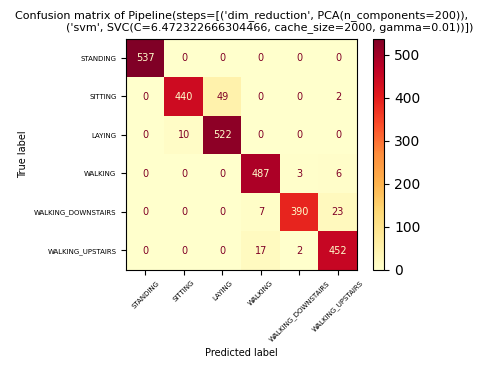

In [ ]:
show_confusion_matrix(search_rbf.best_estimator_, X_train, y_train, X_test, y_test)

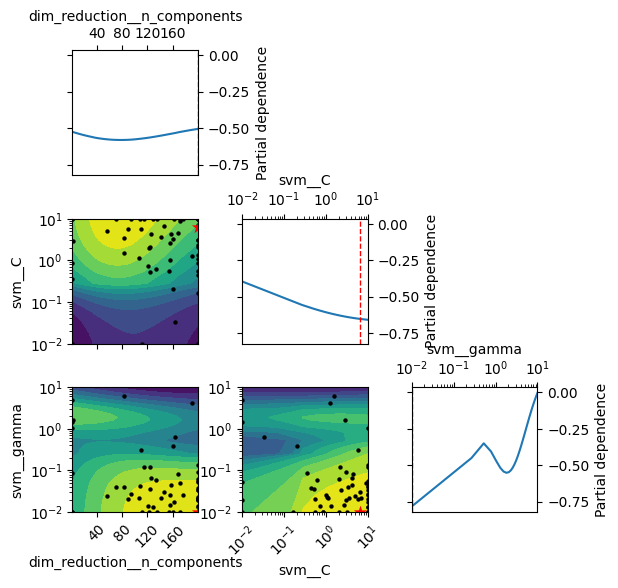

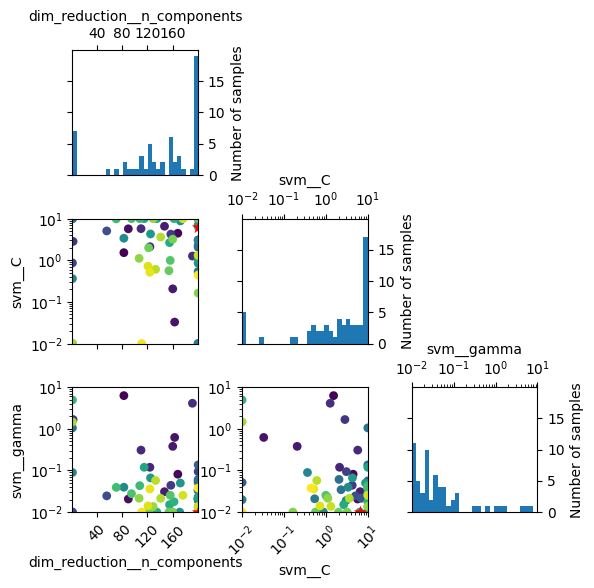

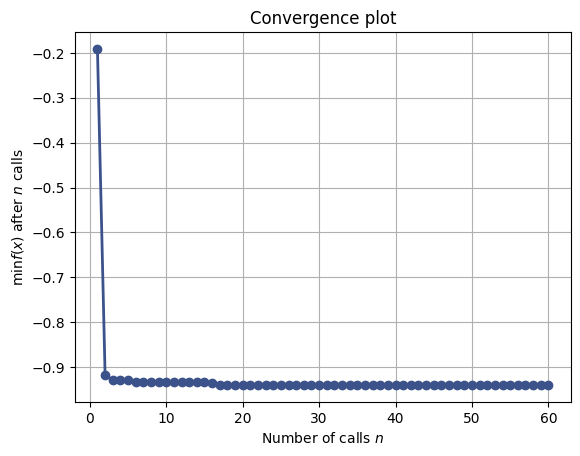

In [ ]:
plot_convergence_and_objective_function(search_rbf.optimizer_results_[0])

## Kernel Polinomial

>  *\[...] the latter [polynomial kernel] is quite popular in natural language processing [...] The most common degree is d = 2 (quadratic), since larger degrees tend to overfit on NLP problems.*

El espacio transformado puede alcanzar dimensiones de hasta $ \binom{n + d - 1}{d} $ , donde $n=513$ y $d$ es el grado del polimomio. Esto se traduce en millones de características implícitas, lo que ralentiza drásticamente el entrenamiento.
[fuente](https://raw.githubusercontent.com/slds-lmu/lecture_sl/main/slides-pdf/slides-nonlinsvm-kernel-poly.pdf)

Por ahora este kernel es demasiado complejo en terminos de tiempo.
Si hay tiempo aproximarlo con esto:

[Scalable learning with polynomial kernel approximation](https://scikit-learn.org/1.5/auto_examples/kernel_approximation/plot_scalable_poly_kernels.html)

In [ ]:
pipeline = Pipeline([
    ('dim_reduction', PCA()),
    ('svm', SVC(cache_size=4000))
])
# estos nombres de la forma "x__y" se leen como "el parámetro *y* del elemento *x* en la pipeline"
param_grid = {
    'dim_reduction__n_components': list(range(2,10+1)), # buscamos reducir la dimensionalidad
    'svm__C': np.logspace(-2, 10, 20),
    'svm__degree': list(range(1,4)),
    #'svm__coef0' : (0, 0.001, 0.01, 0.1),#np.logspace(-2, 10, 35), # TODO quitado porque no se que hace y paraece que tarda muchisimo
    'svm__kernel': ['poly']
}
search_space_size(param_grid)

Size of hyperparameter space: 540 possible combinations.


In [ ]:
'''search_poly = RandomizedSearchCV(
    pipeline,
    param_grid,
    n_iter=2,
    cv=kfold,
    random_state=STATE,
    n_jobs=-1,
    return_train_score=True
)

start = perf_counter()
search_poly.fit(X_train, y_train)
print_time(start)'''

'search_poly = RandomizedSearchCV(\n    pipeline,\n    param_grid,\n    n_iter=2,\n    cv=kfold,\n    random_state=STATE,\n    n_jobs=-1,\n    return_train_score=True\n)\n\nstart = perf_counter()\nsearch_poly.fit(X_train, y_train)\nprint_time(start)'

In [ ]:
'''best_score_ = search_poly.best_score_
print('Best score:', best_score_)

model_evaluation(search_poly.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo
cv, df = analize_fitting_crossval(search_poly.cv_results_, top=3) # comprobar overfitting
show_confusion_matrix(search_poly.best_estimator_, X_train, y_train, X_test, y_test)
cv'''

"best_score_ = search_poly.best_score_\nprint('Best score:', best_score_)\n\nmodel_evaluation(search_poly.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo\ncv, df = analize_fitting_crossval(search_poly.cv_results_, top=3) # comprobar overfitting\nshow_confusion_matrix(search_poly.best_estimator_, X_train, y_train, X_test, y_test)\ncv"

## Kernel Sigmoide



https://en.wikipedia.org/wiki/Support_vector_machine#Properties

In [ ]:
pipeline = Pipeline([
    ('dim_reduction', PCA()),
    ('svm', SVC(cache_size=2000))
])
# estos nombres de la forma "x__y" se leen como "el parámetro *y* del elemento *x* en la pipeline"
param_grid = {
    'dim_reduction__n_components': Integer(2,260), # buscamos reducir la dimensionalidad
    'svm__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svm__coef0' : Real(-5, 5),
    'svm__kernel': ['sigmoid']
}
search_space_size(param_grid)

Size of hyperparameter space: 3956 possible combinations.


In [ ]:
values = np.logspace(-2, 10, 35)

plt.figure(figsize=(7, 4))
plt.plot(values, marker='o')
plt.yscale('log')  # y-axis to logarithmic scale
plt.title('Plot of C values on log scale')
plt.xlabel('Index')
plt.ylabel('Value (log scale)')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


NameError: name 'np' is not defined

In [ ]:
search_sigmoid = BayesSearchCV(
    pipeline,
    param_grid,
    n_iter=NUM_ITER,
    cv=kfold,
    random_state=STATE,
    n_jobs=-1,
    return_train_score=True
)
start = perf_counter()
search_sigmoid.fit(X_train, y_train)
print_time(start)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Total training time:  16 min, 33.9 sec


In [ ]:
best_score_ = search_sigmoid.best_score_
print('Best score:', best_score_)

model_evaluation(search_sigmoid.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo
cv, df = analize_fitting_crossval(search_sigmoid.cv_results_, top=3) # comprobar overfitting
cv

Best score: 0.8713275299238303
░░▒▒▓▓ Model Evaluation over Test Set ▓▓▒▒░░

Test Set Performance:
Accuracy: 0.8897
F1-Score (weighted): 0.8894

Classification Report (simplified):
                    f1-score  support
STANDING              1.0000      537
SITTING               0.9110      491
LAYING                0.9246      532
WALKING               0.7950      496
WALKING_DOWNSTAIRS    0.7503      420
WALKING_UPSTAIRS      0.9242      471
accuracy              0.8897        0
macro avg             0.8842     2947
weighted avg          0.8894     2947



,mean_validation_score,mean_train_score,diff_train_validation,rank_validation_score,n_components,C,coef0,kernel
46,0.8713,0.928,0.0566,1,146,1.447346,-1.000000,sigmoid
31,0.8668,0.916,0.0492,2,166,2.376540,-1.000000,sigmoid
40,0.8668,0.919,0.0521,3,200,2.463572,-0.473584,sigmoid


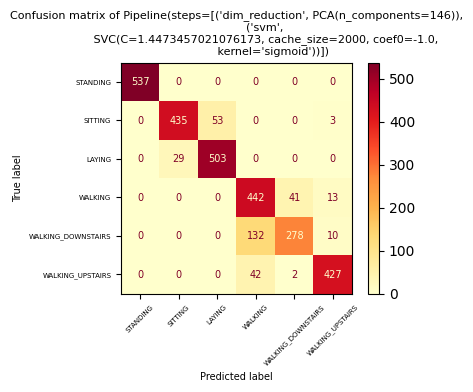

In [ ]:
show_confusion_matrix(search_sigmoid.best_estimator_, X_train, y_train, X_test, y_test)

https://scikit-optimize.github.io/stable/modules/plots.html

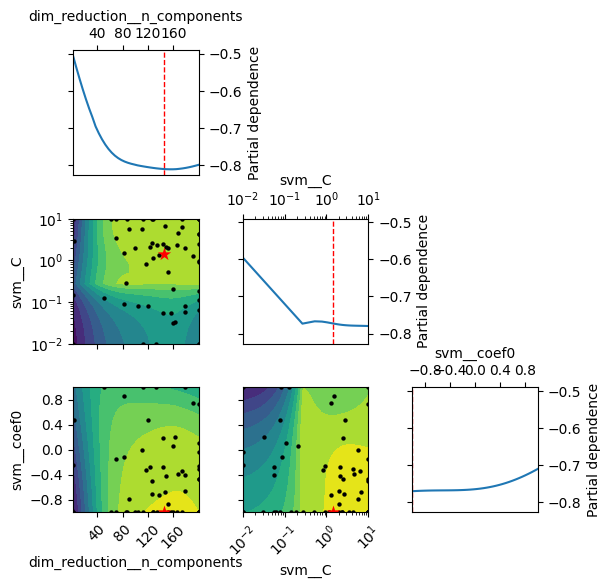

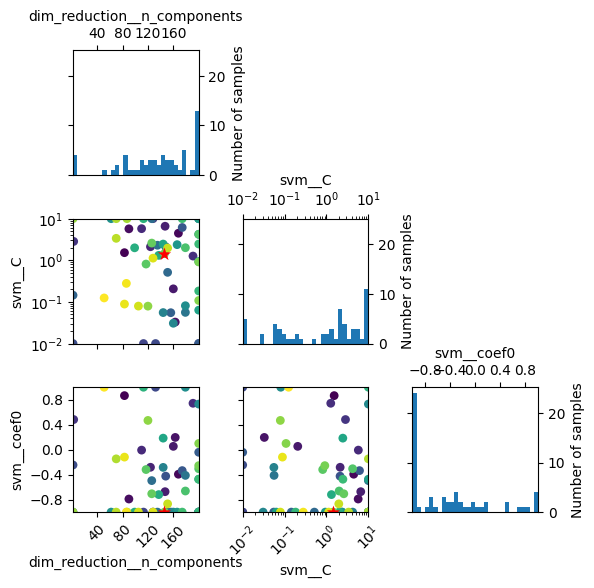

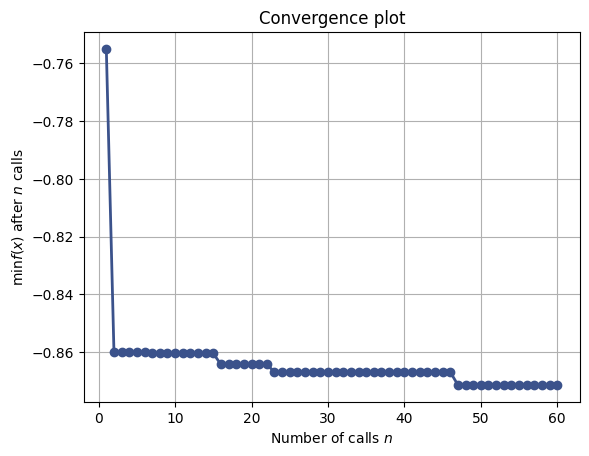

In [ ]:
plot_convergence_and_objective_function(search_sigmoid.optimizer_results_[0])

## Kernel Lineal

In [ ]:
pipeline = Pipeline([
    ('dim_reduction', PCA()),
    ('svm', SVC())
])

param_grid = {
    'dim_reduction__n_components': Integer(2,260),
    'svm__C': Real(1e-3, 1e3, prior='log-uniform'),
    'svm__kernel': ['linear']
}
search_space_size(param_grid)

Size of hyperparameter space: 1978 possible combinations.


In [ ]:
search_linear = BayesSearchCV(
    pipeline,
    param_grid,
    n_iter=NUM_ITER,
    cv=kfold,
    random_state=STATE,
    n_jobs=-1,
    return_train_score=True
)
start = perf_counter()
search_linear.fit(X_train, y_train)
print_time(start)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Total training time:  8 min, 1.2 sec


In [ ]:
model_evaluation(search_linear.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo
cv, df = analize_fitting_crossval(search_linear.cv_results_, top=3) # comprobar overfitting
cv

░░▒▒▓▓ Model Evaluation over Test Set ▓▓▒▒░░

Test Set Performance:
Accuracy: 0.9644
F1-Score (weighted): 0.9643

Classification Report (simplified):
                    f1-score  support
STANDING              1.0000      537
SITTING               0.9255      491
LAYING                0.9384      532
WALKING               0.9752      496
WALKING_DOWNSTAIRS    0.9784      420
WALKING_UPSTAIRS      0.9689      471
accuracy              0.9644        0
macro avg             0.9644     2947
weighted avg          0.9643     2947



,mean_validation_score,mean_train_score,diff_train_validation,rank_validation_score,n_components,C,kernel
52,0.9400,0.9935,0.0535,1,200,0.482465,linear
23,0.9395,0.9932,0.0537,2,200,0.391586,linear
59,0.9392,0.9933,0.0541,3,200,0.425567,linear


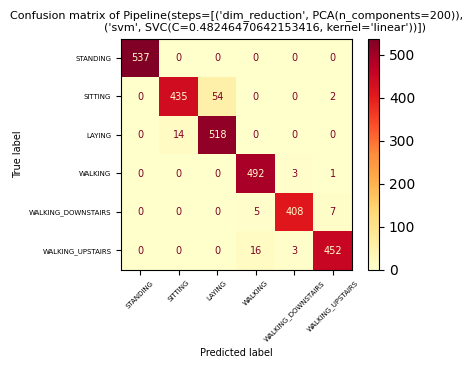

In [ ]:
show_confusion_matrix(search_linear.best_estimator_, X_train, y_train, X_test, y_test)

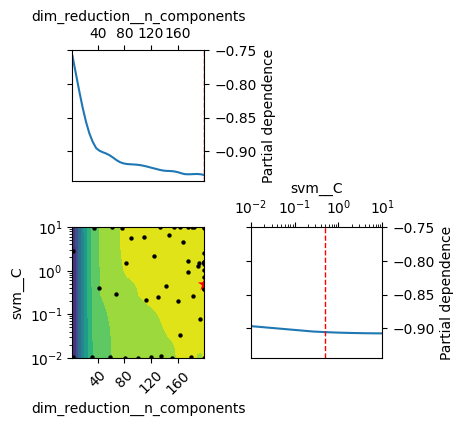

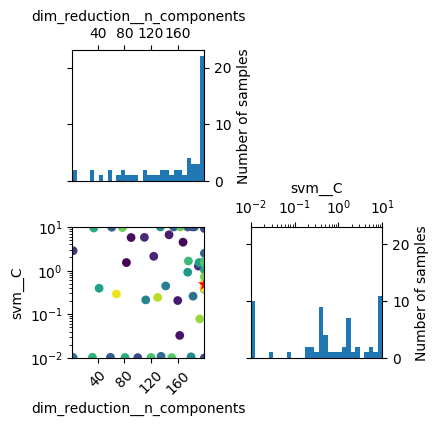

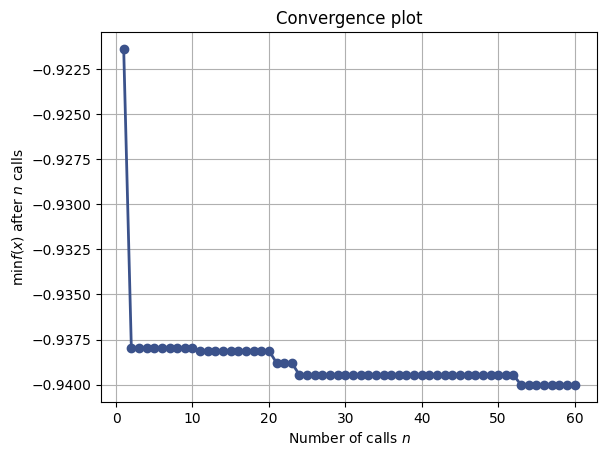

In [ ]:
plot_convergence_and_objective_function(search_linear.optimizer_results_[0])

https://scikit-learn.org/1.5/auto_examples/compose/plot_compare_reduction.html#sphx-glr-auto-examples-compose-plot-compare-reduction-py

https://scikit-learn.org/stable/auto_examples/compose/plot_feature_union.html#sphx-glr-auto-examples-compose-plot-feature-union-py




# Enfoque con k-Nearest Neighbours

La idea general de este enfoque es utilizar los distintos algoritmos que se proprocionan para `KNeighborsClassifier` y averiguar cuales son los más rápidos sobre el conjuntos de datos sin sacrificar demasiada optimalidad.

Probar en menos y en más dimensiones, ver cómo se las apañan cada uno
Plottear los tiempos de ejecución molaría.
También plottear alguna métrica vs 2 hiperparámetros

### Hiperparámetros

Como se menciona anteriormente, se han realizado las optimizaciones basadas en los distintos algoritmos. Se hará una para cada uno, y en cada una de ellas se optimizarán, además del parámetro $k$ (`n_neighbors`):
- Los pesos asignados a cada instancia, `uniform` o `distance`.
- El valor `p` para la distancia de Minkowsky, en un rango de $[1,5]$.

  $$d(x, y) = \left( \sum_{r=1}^n |x[r] - y[r]|^p \right)^{\frac{1}{p}}$$

  Los valores $1$ y $2$ equivalen a las distancias Manhattan y euclídea respectivamente. Valores superiores aumentan la importancia que se le da a las diferencias más grandes de $x[r]-y[r]$.

- `algorithm`: el algoritmo utilizado para la computación de los vecinos más cercanos.

  - `brute`: el algoritmo estándar, comprueba todos las instancias del dataset para ver cuáles son las más cercanas.

  - `kd-tree`: utilizando un árbol k-dimensional como estructura de datos auxiliar permite acelerar el algoritmo estándar en números bajos de dimensiones.

  - `ball-tree`: utilizando una estructura de árbol en la que las hojas son una serie de hiperesferas anidadas puede mejorar el rendimiento de `kd-tree` en números altos de dimensiones, a costa de un overhead en la creación de dicha estructura.

### Validación

### Preprocesado

### Otras aclaraciones

Optimizamos para 2 tipos de algoritmo para ver si mejoran tiempo uno con respecto al otro.
También tuneamos el prarmetro leaf porque determina lo buena que será la estructura de árbol creada de cada algoritmo.
K es un parámetro básico y hay que tunearlo bien
p y wheights podrían afectar en la clasificación así que merece la pena probarlos

mirar si hay que poner los datos positivos!!!!

crea una estructura de datos (del mismo nombre) en forma de árbol, que divide las k dimensiones del conjunto de datos (distinto del k del kNN) de forma recursiva. El hecho de no tener que comparar con todas las muestras del conjunto de entrenamiento le permite entrenarse en un menor tiempo.

> *\[...] Though the KD tree approach is very fast for low-dimensional ($D<20$) neighbors searches, it becomes inefficient as
grows very large: this is one manifestation of the so-called “curse of dimensionality”.*

> *\[...] Where KD trees partition data along Cartesian axes, ball trees partition data in a series of nesting hyper-spheres. This makes tree construction more costly than that of the KD tree, but results in a data structure which can be very efficient on highly structured data, even in very high dimensions.*

[Nearest Neighbor Algorithms](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbor-algorithms)

[tree knn benchmarks](https://jakevdp.github.io/blog/2013/04/29/benchmarking-nearest-neighbor-searches-in-python/#Scaling-with-Leaf-Size)

### OPCIONAL
experimento: después de encontrar los hiperparámetros adecuados, buscar optimizar el tiempo de ejecución del algoritmo cambiando leaf size y probando con los dos aalgoritmos
- `leaf_size`: este parámetro afecta al tamaño de las hojas de los algoritmos anteriores. En

## Modelo Base

De nuevo creamos un modelo base sin optimización de hiperparámetros ni preprocesamiento para comparar los resultados de los próximos modelos basados en kNN.

Cabe destacar que sin esspecificación de hiperaprámetros, `KneighborsClassifier` toma por defecto los siguientes:

- `n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'`

Para tener una idea de como se comporta el algoritmo 'estándar' de kNN, se especificará el parámetro `algorithm='brute'` ya que es el más básico de los disponibles, y en caso de no especificarlo, el algoritmo se elige automáticamente en función de los datos que se le pasen.

In [ ]:
knn = KNeighborsClassifier(algorithm='brute')
start = perf_counter()
knn.fit(X_holdout_train, y_holdout_train)
print_time(start)

Total training time:  0 min, 0.1 sec


In [ ]:
analize_fitting_estimator(knn, X_holdout_train, y_holdout_train, X_val, y_val) # comparar resultados
model_evaluation(knn, X_train, y_train, X_test, y_test) # evaluar métricas del modelo

░░▒▒▓▓ Evaluating Overfitting on Validation and Training sets ▓▓▒▒░░
Model:  KNeighborsClassifier(algorithm='brute')
accuracy_validation_set 0.9673617407071623
accuracy_training_set 0.9822371579452712
Accuracy difference between training and validation 0.014875417238108923

░░▒▒▓▓ Model Evaluation over Test Set ▓▓▒▒░░

Test Set Performance:
Accuracy: 0.8992
F1-Score (weighted): 0.8983

Classification Report (simplified):
                    f1-score  support
STANDING              0.9963      537
SITTING               0.8447      491
LAYING                0.8767      532
WALKING               0.9101      496
WALKING_DOWNSTAIRS    0.8583      420
WALKING_UPSTAIRS      0.8903      471
accuracy              0.8992        0
macro avg             0.8961     2947
weighted avg          0.8983     2947



## Algoritmo KD

In [ ]:
pipeline = Pipeline([
    ('dim_reduction', PCA()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'dim_reduction__n_components': Integer(2,20), # as suggested in documentation
    'knn__n_neighbors': Integer(1,30),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': Integer(1, 5),
    #'knn__leaf_size': Integer(20, 500),
    'knn__algorithm': ['kd_tree'],
}
search_space_size(param_grid)

Size of hyperparameter space: 4176 possible combinations.


In [ ]:
search_knn_kd = BayesSearchCV(
    pipeline,
    param_grid,
    n_iter=NUM_ITER,
    cv=kfold,
    random_state=STATE,
    n_jobs=-1,
    return_train_score=True
)

start = perf_counter()
search_knn_kd.fit(X_train, y_train)
print_time(start)

Total training time:  9 min, 52.5 sec


In [ ]:
best_score_ = search_knn_kd.best_score_
print('Best score:', best_score_)

model_evaluation(search_knn_kd.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo
cv, df = analize_fitting_crossval(search_knn_kd.cv_results_, top=3) # comprobar overfitting
cv

Best score: 0.859221980413493
░░▒▒▓▓ Model Evaluation over Test Set ▓▓▒▒░░

Test Set Performance:
Accuracy: 0.8636
F1-Score (weighted): 0.8625

Classification Report (simplified):
                    f1-score  support
STANDING              0.9830      537
SITTING               0.7704      491
LAYING                0.8283      532
WALKING               0.8831      496
WALKING_DOWNSTAIRS    0.8133      420
WALKING_UPSTAIRS      0.8819      471
accuracy              0.8636        0
macro avg             0.8600     2947
weighted avg          0.8625     2947



,mean_validation_score,mean_train_score,diff_train_validation,rank_validation_score,n_components,algorithm,n_neighbors,p,weights
24,0.8592,1.0,0.1408,1,20,kd_tree,26,5,distance
10,0.8577,1.0,0.1423,2,20,kd_tree,30,5,distance
46,0.8577,1.0,0.1423,3,20,kd_tree,24,1,distance


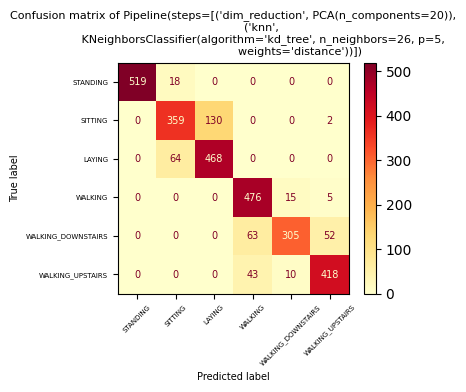

In [ ]:
show_confusion_matrix(search_knn_kd.best_estimator_, X_train, y_train, X_test, y_test)

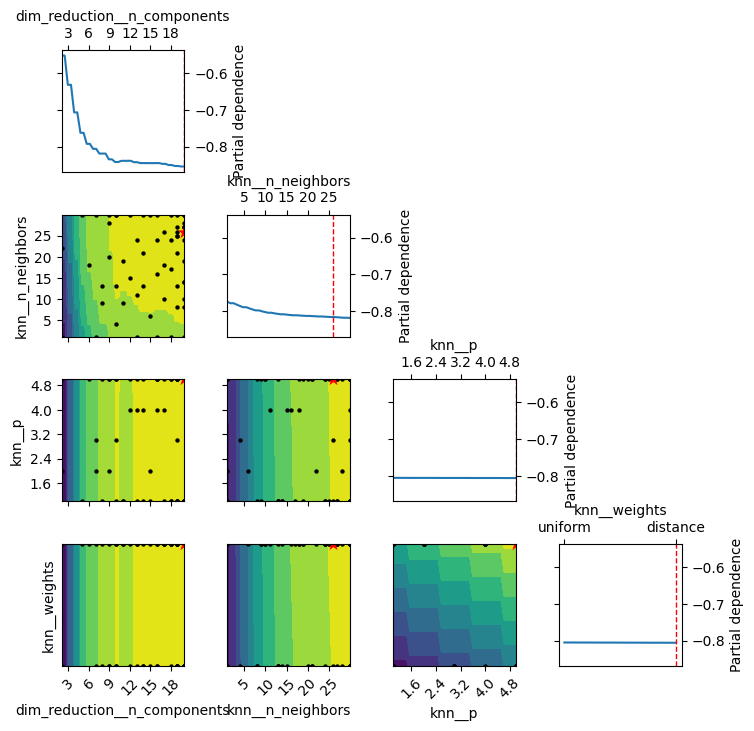

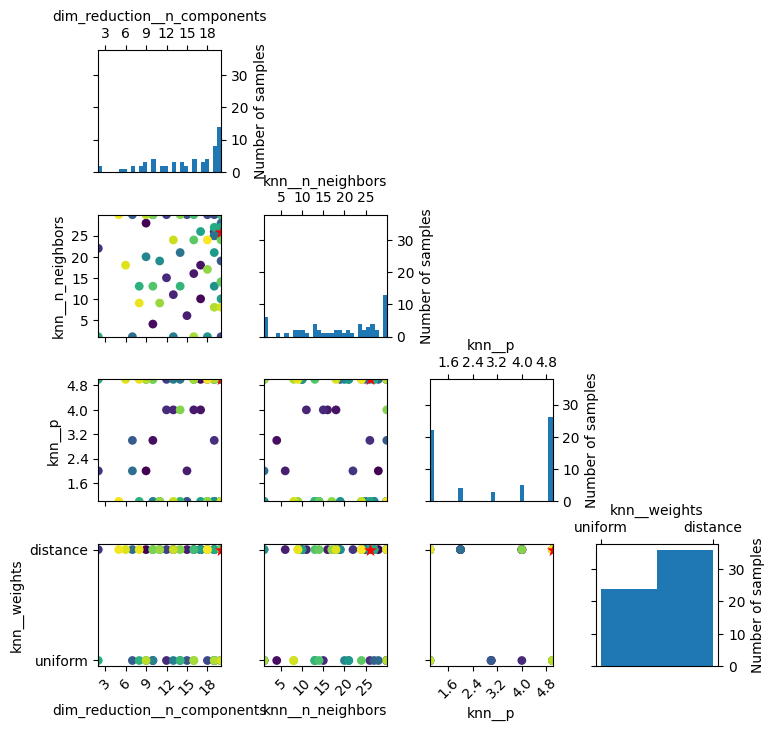

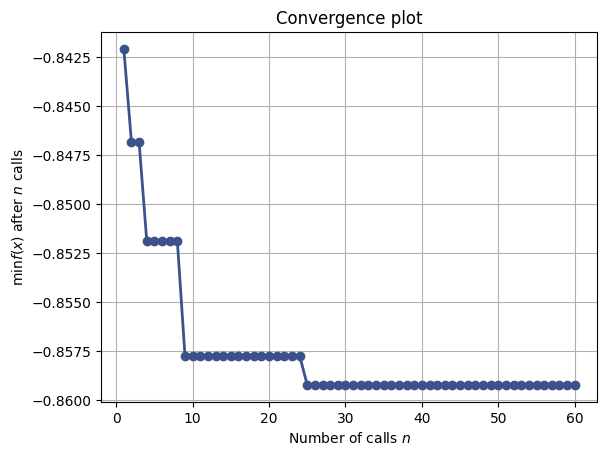

In [ ]:
plot_convergence_and_objective_function(search_knn_kd.optimizer_results_[0])

## Algoritmo Ball Tree

In [ ]:
pipeline = Pipeline([
    ('dim_reduction', PCA()),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'dim_reduction__n_components': Integer(2,300),
    'knn__n_neighbors': Integer(1,50),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': Integer(1, 5),
    #'knn__leaf_size': Integer(20, 500),
    'knn__algorithm': ['ball_tree'],
}
search_space_size(param_grid)

Size of hyperparameter space: 116816 possible combinations.


In [ ]:
search_knn_ball = BayesSearchCV(
    pipeline,
    param_grid,
    n_iter=NUM_ITER,
    cv=kfold,
    random_state=STATE,
    n_jobs=-1,
    return_train_score=True
)

start = perf_counter()
search_knn_ball.fit(X_train, y_train)
print_time(start)

In [ ]:
best_score_ = search_knn_ball.best_score_
print('Best score:', best_score_)

model_evaluation(search_knn_ball.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo
cv, df = analize_fitting_crossval(search_knn_ball.cv_results_, top=3) # comprobar overfitting
cv

In [ ]:
show_confusion_matrix(search_knn_ball.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:
plot_convergence_and_objective_function(search_knn_ball.optimizer_results_[0])

In [ ]:
#plottear como los par´ametros afectan el score a medida que cambian: usar el rank y pillar los 10 mejores, plot score versus cada parametro

# Enfoque con Árboles de decision

> *...no feature selection rule is consistently
superior to the others, and that no specific strategy for alternating different rules is significantly more effective.*

> *...the tree quality does not seem to depend on the specific criterion used.*

[Theoretical comparison between the Gini Index and
Information Gain criteria](https://www.unine.ch/files/live/sites/imi/files/shared/documents/papers/Gini_index_fulltext.pdf)

## Modelo base


In [ ]:
base = DecisionTreeClassifier()
start = perf_counter()
base.fit(X_holdout_train, y_holdout_train)
print_time(start)

In [ ]:
analize_fitting_estimator(base, X_holdout_train, y_holdout_train, X_val, y_val) # comparar resultados
model_evaluation(base, X_train, y_train, X_test, y_test) # evaluar métricas del modelo

## Árbol sin reducción de dimensionalidad

In [ ]:
maxdepth = base.tree_.max_depth
nleaves = base.tree_.n_leaves

In [ ]:
pipeline = Pipeline([
    # aqui quité la reduccion
    #('dim_reduction', PCA()),
    ('tree', DecisionTreeClassifier())
])

param_grid = {
    # parámetro de la reducción eliminado
    #'dim_reduction__n_components': Integer(2,40),
    'tree__max_depth' : Integer(2,maxdepth),
    'tree__max_leaf_nodes' : Integer(2,nleaves),
    'tree__min_samples_split': Integer(2, 100),
    'tree__min_samples_leaf': Integer(2, 100),
}

search_space_size(param_grid)

In [ ]:
search_tree = BayesSearchCV(
    pipeline,
    param_grid,
    n_iter=NUM_ITER,
    cv=kfold,
    random_state=STATE,
    n_jobs=-1,
    return_train_score=True
)
start = perf_counter()
search_tree.fit(X_train, y_train)
print_time(start)

In [ ]:
best_score_ = search_tree.best_score_
print('Best score:', best_score_)

model_evaluation(search_tree.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo
cv, df = analize_fitting_crossval(search_tree.cv_results_, top=3) # comprobar overfitting
cv

In [ ]:
show_confusion_matrix(search_tree.best_estimator_, X_train, y_train, X_test, y_test)

In [ ]:

print(search_tree.optimizer_results_[0])
plot_convergence_and_objective_function(search_tree.optimizer_results_[0])

In [ ]:
from sklearn.tree import plot_tree

def plot_trained_tree(model, feature_names, class_names=None, size=(20,12)):

    plt.figure(figsize=size)
    plot_tree(model, feature_names=feature_names, class_names=class_names, filled=True, precision=2, proportion=True, fontsize=6)

    plt.show()

In [ ]:
plot_trained_tree(search_tree.best_estimator_['tree'], feature_names=X_train.columns, class_names=y_train.unique())

## Árbol con optimización de hiperparámetros

- Los árboles no necesitan ningún tipo de preprocesado de los datos así que no hace falta incluír escalado ni normalización.

- Es necesario incluír reducción? Quizás se pueda conseguir lo mismo con hiperparámetros...

In [ ]:
pipe = Pipeline([
    # esto indica que los parametros pasados con el nombre reduce_dim van a especificarse en el grid
    ("dim_reduction", "passthrough"),
    ('tree', DecisionTreeClassifier())
])

N_FEATURES_OPTIONS = Integer(2,514),
from sklearn.decomposition import NMF

param_grid = [
    {
        "dim_reduction": Categorical(PCA(iterated_power=7), NMF(max_iter=1_000)),
        "dim_reduction__n_components": N_FEATURES_OPTIONS,

        'tree__max_depth' : Integer(1, maxdepth),
        'tree__max_leaf_nodes' : Integer(2, nleaves),
        'tree__min_samples_split': Integer(2, 100),
        'tree__min_samples_leaf': Integer(1, 100),
    },
    {
        "dim_reduction": [SelectKBest(mutual_info_classif)],
        "dim_reduction__k": N_FEATURES_OPTIONS,

        'tree__max_depth' : Integer(1, maxdepth),
        'tree__max_leaf_nodes' : Integer(2, nleaves),
        'tree__min_samples_split': Integer(2, 100),
        'tree__min_samples_leaf': Integer(1, 100),
    },
]
search_space_size(param_grid[0])
search_space_size(param_grid[1])

In [ ]:
search_tree_reduced = BayesSearchCV(
    pipeline,
    param_grid,
    n_iter=NUM_ITER,
    cv=kfold,
    random_state=STATE,
    n_jobs=-1,
    return_train_score=True
)
start = perf_counter()
search_tree_reduced.fit(X_train, y_train)
print_time(start)

In [ ]:
best_score_ = search_tree_reduced.best_score_
print('Best score:', best_score_)

model_evaluation(search_tree_reduced.best_estimator_, X_train, y_train, X_test, y_test) # evaluar métricas del modelo
cv, df = analize_fitting_crossval(search_tree_reduced.cv_results_, top=3) # comprobar overfitting
cv

In [ ]:
show_confusion_matrix(search_tree_reduced.best_estimator_, X_train, y_train, X_test, y_test)

[Hyperparameter Optimization (HPO) of Machine Learning Models](https://github.com/LiYangHart/Hyperparameter-Optimization-of-Machine-Learning-Algorithms/blob/master/HPO_Classification.ipynb)

In [ ]:
'''import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.decomposition import NMF, PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC'''

X, y = load_digits(return_X_y=True)

pipe = Pipeline(
    [
        ("scaling", MinMaxScaler()),
        # the reduce_dim stage is populated by the param_grid
        # esto indica que los parametros pasados con el nombre reduce_dim van a especificarse en el grid
        ("reduce_dim", "passthrough"),
        ("classify", LinearSVC(dual=False, max_iter=10000)),
    ]
)

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        "reduce_dim": [PCA(iterated_power=7), NMF(max_iter=1_000)],
        # esto se lee: "reduce_dim" + "__" + "n_components"
        # especifica el parametro concreto que se le pasa a este Transformer para su atributo "n_components"
        "reduce_dim__n_components": N_FEATURES_OPTIONS,
        # aqui indicamos que C_OPTIONS son los valores que se le va a pasar al parámetro C del estimador de "classify"
        "classify__C": C_OPTIONS,
    },
    {
        "reduce_dim": [SelectKBest(mutual_info_classif)],
        "reduce_dim__k": N_FEATURES_OPTIONS,
        "classify__C": C_OPTIONS,
    },
]
reducer_labels = ["PCA", "NMF", "KBest(mutual_info_classif)"]

grid = GridSearchCV(pipe, n_jobs=1, param_grid=param_grid)
grid.fit(X, y)

https://scikit-learn.org/1.5/auto_examples/miscellaneous/plot_pipeline_display.html

https://scikit-learn.org/1.5/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py